In [204]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model, Model
from tensorflow.keras.layers import Flatten, Dense, Input, concatenate
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor, GradientBoostingRegressor

from tensorflow.keras.optimizers import SGD, Adam
import matplotlib .pyplot as plt

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.metrics import accuracy_score

from datetime import datetime
import cv2
import zipfile
import shutil
import os
import glob
import math

from tqdm import tqdm_notebook
from tensorflow.keras.applications import Xception, ResNet50
from tensorflow.keras.applications import InceptionV3, MobileNet

In [2]:
import matplotlib.font_manager as fm # 폰트연결 시켜주는 모듈
font_name = fm.FontProperties(fname = "C:\\Windows\\Fonts\\malgun.ttf").get_name()
plt.rc("font", family = font_name)

# 마이너스 사인 해결
import matplotlib as mlp
mlp.rcParams["axes.unicode_minus"] = False

# 워닝소리 미전시
import warnings
warnings.filterwarnings("ignore") 

# 1. 데이터 재탐색

In [3]:
farm1_outer = pd.read_csv("tomato_farm_set/tom1.csv", encoding = "utf-8", index_col = 0)
round(farm1_outer.isnull().sum()/len(farm1_outer)*100, 2) # 총 3438개

날짜           0.00
J/Day        0.00
평균온도        86.59
EC급액        86.59
EC배액        86.59
pH급액        86.59
pH배액        86.59
내부이산화탄소     86.59
온도토양       100.00
온도급액       100.00
온도배액       100.00
dtype: float64

In [4]:
farm1 = pd.read_csv("tomato_farm_set/tom1_inner.csv", encoding = "utf-8", index_col = 0)
farm1.isnull().sum() # 총 461개

날짜         0
EC급액       0
EC배액       0
pH급액       0
pH배액       0
내부이산화탄소    0
평균온도       0
J/Day      0
dtype: int64

In [5]:
farm2 = pd.read_csv("tomato_farm_set/tom2.csv", encoding = "utf-8", index_col = 0)
round(farm2.isnull().sum()/len(farm2)*100, 2) # 총 1359개

날짜           0.0
J/Day      100.0
평균온도         0.0
EC급액         0.0
EC배액         0.0
pH급액         0.0
pH배액         0.0
내부이산화탄소      0.0
온도토양         0.0
온도급액       100.0
온도배액       100.0
dtype: float64

In [6]:
farm3 = pd.read_csv("tomato_farm_set/tom3.csv", encoding = "utf-8", index_col = 0)
round(farm3.isnull().sum()/len(farm3)*100, 2) # 총 18888개 / 버린다.

날짜           0.0
J/Day       70.9
평균온도        70.9
EC급액       100.0
EC배액       100.0
pH급액       100.0
pH배액       100.0
내부이산화탄소     70.9
온도토양       100.0
온도급액       100.0
온도배액       100.0
dtype: float64

In [7]:
farm4 = pd.read_csv("tomato_farm_set/tom4.csv", encoding = "utf-8", index_col = 0)
round(farm4.isnull().sum()/len(farm4)*100, 2) # 2799개 / 버리자

날짜          0.00
J/Day       0.46
평균온도       98.43
EC급액       98.43
EC배액       98.43
pH급액       98.43
pH배액       98.43
내부이산화탄소    98.43
온도토양       98.43
온도급액       98.43
온도배액       98.43
dtype: float64

In [8]:
farm5 = pd.read_csv("tomato_farm_set/tom5.csv", encoding = "utf-8", index_col = 0)
round(farm5.isnull().sum()/len(farm5)*100, 2) # 총 119개

날짜           0.0
J/Day      100.0
평균온도         0.0
EC급액         0.0
EC배액         0.0
pH급액         0.0
pH배액         0.0
내부이산화탄소      0.0
온도토양         0.0
온도급액         0.0
온도배액         0.0
dtype: float64

In [9]:
farm6 = pd.read_csv("tomato_farm_set/tom6.csv", encoding = "utf-8", index_col = 0)
round(farm6.isnull().sum()/len(farm6)*100, 2) # 총 1370개

날짜          0.00
J/Day      15.33
평균온도       67.81
EC급액       67.81
EC배액       67.81
pH급액       67.81
pH배액       67.81
내부이산화탄소    67.81
온도토양       67.81
온도급액       67.81
온도배액       67.81
dtype: float64

In [10]:
# 21년도 파괴데이터
dst_tom_21 = []
for i in range(45, 53):
    try:
        dst_tom_df = pd.read_excel("tomato_farm_set/destroy_tomato.xlsx", 
                      sheet_name = "{}주차".format(i), 
                      skiprows = 3)
        print("{}주차".format(i), dst_tom_df.head())
        dst_tom_df = dst_tom_df.loc[1:100]
        dst_tom_df["주차"] = "{}".format(i)
        dst_tom_21.append(dst_tom_df[["주차", "과중", "당도", "산도"]])          
        
    except Exception as e: 
        print(e)

45주차    수집항목   과폭   과고   과중      당도    산도    경도    수분율
0  개체번호   cm   cm    g  Brix %  0-14   kgf      %
1     1  7.4  5.8  205     4.1     4  2.65  71.25
2     2  7.9  6.2  210     4.7     4   2.7   72.5
3     3  7.7    6  205     4.7     4   2.7  71.25
4     4  7.8  5.7  206     4.7   4.5  2.72     75
46주차    수집항목   과폭   과고   과중      당도    산도    경도    수분율
0  개체번호   cm   cm    g  Brix %  0-14   kgf      %
1     1  8.6  6.6  276     4.2     4  2.65   76.5
2     2  9.2    7  375     4.1     4   2.7   72.5
3     3  7.6  7.1  241     4.2     4   2.7  71.25
4     4  8.4  6.7  247     3.8     4  2.72     75
47주차    수집항목   과폭   과고   과중      당도    산도    경도    수분율
0  개체번호   cm   cm    g  Brix %  0-14   kgf      %
1     1  6.6  6.9  168       4     4  2.65   76.5
2     2  7.5    7  223       4     4  2.71   72.5
3     3    7  6.5  182       4     4   2.8  71.25
4     4  6.4    7  159     3.7     4  2.72   79.5
48주차    수집항목    과폭   과고   과중      당도    산도    경도   수분율
0  개체번호    cm   cm    g  Brix 

In [11]:
# 22년도 파괴데이터
dst_tom_22 = []
for i in range(1, 7):
    try:    
        dst_tom_df = pd.read_excel("tomato_farm_set/destroy_tomato.xlsx", 
                        sheet_name = "{}주차".format(str(i).zfill(2)),
                        skiprows = 3)
        print("{}주차".format(i).zfill(2), dst_tom_df)
        dst_tom_df = dst_tom_df.loc[1:100]
        dst_tom_df["주차"] = "{}".format(str(i).zfill(2))
        dst_tom_22.append(dst_tom_df[["주차", "과중", "당도", "산도"]])
            
    except Exception as e: 
        print(e)

1주차      수집항목      과폭      과고      과중      당도    산도       경도      수분율
0    개체번호      cm      cm       g  Brix %  0-14      kgf        %
1       1     8.5     6.2     277     3.8     4     2.71     75.4
2       2     7.4     5.8     183     3.8     4     2.78       72
3       3     8.3    6.14     223     3.9     4    2.752     75.1
4       4     8.7     6.3     260     4.1   3.5     2.74     73.2
..    ...     ...     ...     ...     ...   ...      ...      ...
97     97     7.4     5.9     191     3.7     4     2.74       70
98     98     9.4       7     300     3.4     4     2.74     71.9
99     99     7.1     5.7     161     4.1     4      2.7     70.8
100   100     6.8     5.3     136     4.2     4     2.71     71.7
101   평균값  7.5624  6.0964  204.37  3.7888  4.02  2.73789  72.6165

[102 rows x 8 columns]
2주차      수집항목    과폭     과고      과중      당도     산도        경도       수분율
0    개체번호    cm     cm       g  Brix %   0-14       kgf         %
1       1   7.9    5.9     224     3.7      

In [12]:
for i in range(len(dst_tom_21)):
    print(str(i+45) + "주차", dst_tom_21[i].astype("float32").describe())
    print("----------------------------------------------------------------")
# 21년도 과중, 당도, 산도의 평균 - 중앙값의 차이는 크지 않은듯 하다

45주차           주차          과중          당도          산도
count  100.0  100.000000  100.000000  100.000000
mean    45.0  245.850006    4.488999    4.025000
std      0.0   57.880814    0.283875    0.164762
min     45.0  138.000000    4.100000    3.500000
25%     45.0  205.000000    4.300000    4.000000
50%     45.0  237.000000    4.400000    4.000000
75%     45.0  280.000000    4.700000    4.000000
max     45.0  400.000000    5.400000    4.500000
----------------------------------------------------------------
46주차           주차          과중          당도          산도
count  100.0  100.000000  100.000000  100.000000
mean    46.0  246.660004    4.373999    4.020000
std      0.0   46.536884    4.057034    0.140705
min     46.0  150.000000    3.400000    3.500000
25%     46.0  213.750000    3.900000    4.000000
50%     46.0  248.000000    4.000000    4.000000
75%     46.0  278.250000    4.025000    4.000000
max     46.0  375.000000   44.500000    4.500000
-------------------------------------------

In [13]:
for i in range(len(dst_tom_22)):
    print(str(i+1) + "주차", dst_tom_22[i].astype("float32").describe())
    print("----------------------------------------------------------------")
# 22년도는 1 ~ 6주차 모두 과중 차이가 나는 경향이 있다.

1주차           주차          과중         당도          산도
count  100.0  100.000000  100.00000  100.000000
mean     1.0  204.369995    3.78880    4.020000
std      0.0   53.756405    0.23281    0.186948
min      1.0   92.000000    3.40000    3.500000
25%      1.0  163.750000    3.67500    4.000000
50%      1.0  196.500000    3.80000    4.000000
75%      1.0  234.500000    3.90000    4.000000
max      1.0  355.000000    4.50000    4.500000
----------------------------------------------------------------
2주차           주차          과중          당도          산도
count  100.0  100.000000  100.000000  100.000000
mean     2.0  183.119995    4.370000    4.045000
std      0.0   52.649078    0.325825    0.225798
min      2.0  109.000000    3.600000    3.500000
25%      2.0  148.500000    4.200000    4.000000
50%      2.0  173.500000    4.300000    4.000000
75%      2.0  219.250000    4.600000    4.000000
max      2.0  400.000000    5.200000    4.500000
------------------------------------------------------

In [14]:
# farm1_inner, 2, 5, 6만 사용하고 결측치 대체작업 시작

# 2. 데이터 결측치 처리
- 1, 2, 5, 6번 농장을 모두 concat한 후, original / KNN impuer / Iteral imputer 등의 방법으로 결측치 대체 및 정답데이터(label)과 결합
- R 다중회귀분석(정규성, 다중공선성, 등분산성 등)
- 각 결측치 처리 데이터프레임 중 회귀분석에 적합한 데이터프레임으로 다중 회귀모델 구축(앙상블, knn 등) 

## 1) 원본 데이터 

In [15]:
# 원본데이터 합체
tom_df = pd.concat([farm1, farm2], axis = 0)
tom_df = pd.concat([tom_df, farm5], axis = 0)
tom_df = pd.concat([tom_df, farm6], axis = 0)

In [16]:
# 원본데이터 결측치 비율
print(round(tom_df.isnull().sum()/len(tom_df)*100, 2))

날짜          0.00
EC급액       28.07
EC배액       28.07
pH급액       28.07
pH배액       28.07
내부이산화탄소    28.07
평균온도       28.07
J/Day      51.01
온도토양       42.01
온도급액       83.08
온도배액       83.08
dtype: float64


In [17]:
dst_tom_21[0]

,주차,과중,당도,산도
1,45,205,4.1,4
2,45,210,4.7,4
3,45,205,4.7,4
4,45,206,4.7,4.5
5,45,223,4.3,4
...,...,...,...,...
96,45,156,4.8,3.5
97,45,243,5.1,4
98,45,260,4.8,4
99,45,233,5.4,4


In [18]:
tom_df["날짜"] = pd.to_datetime(tom_df["날짜"])

In [19]:
## 환경데이터와 파괴데이터 결합
# 환경데이터 "주차" 컬럼 추가
week_list = []
for i in tom_df["날짜"]:
    b = pd.to_datetime("2021-01-01")
    weeks = math.trunc((i - b).days / 7)
    if weeks <= 52:
        week_list.append(str(weeks).zfill(2))
    elif weeks > 52:
        week_list.append(str(weeks - 52).zfill(2))

In [20]:
tom_df["주차"] = week_list # 주차 컬럼 추가
tom_df["주차"] = tom_df["주차"].astype(int) # 주차 자료형 변경
tom_df["주차"].value_counts().sort_index() 

1     166
2     168
3     167
4      96
41     14
42    172
43    203
44    192
45    309
46    368
47    352
48    203
49    335
50    278
51    118
52    168
Name: 주차, dtype: int64

In [21]:
## 45 ~ 52주차 데이터 처리(21년)

import random
np.random.seed(42)

data_21 = []
for i in range(len(dst_tom_21)):
    df_week = tom_df[tom_df["주차"] == (i + 45)]
    
    
    # 환경데이터 중 주차별 100개 임의추출
    idx_list = random.sample(range(len(df_week)), 100)
    df_week = df_week.iloc[idx_list]
    
    # 훈련데이터 
    X = df_week[df_week.columns[1:-1]] 
    X.index = np.arange(1, 101)
    
    # 정답데이터
    y = dst_tom_21[i][dst_tom_21[i].columns[1:]] 
    
    # 전체데이터 set
    data_21.append(pd.concat([X, y], axis = 1))

In [22]:
## 1 ~ 3주차 데이터 처리(22년)
import random
np.random.seed(42)

data_22 = []
for i in range(len(dst_tom_22)):
    try:
        df_week = tom_df[tom_df["주차"] == (i+1)]

        # 환경데이터 중 주차별 100개 임의추출
        idx_list = random.sample(range(len(df_week)), 100)
        df_week = df_week.iloc[idx_list]

        # 훈련데이터 
        X = df_week[df_week.columns[1:-1]] 
        X.index = np.arange(1, 101)

        # 정답데이터
        y = dst_tom_22[i][dst_tom_22[i].columns[1:]] 

        # 전체데이터 set
        data_22.append(pd.concat([X, y], axis = 1))
    except : None

In [23]:
### 4주차 별도처리
df_week = tom_df[tom_df["주차"] == 4]

# 4주차 파괴데이터 100개 중 shuffle 후 96개 데이터 임의추출
idx = np.arange(1, 101)
np.random.shuffle(idx)
dst_tom_22[3].index = idx
dst_tom_22[3] = dst_tom_22[3].iloc[0:96]
dst_tom_22[3].index = np.arange(1, 97)

# 훈련데이터 
X = df_week[df_week.columns[1:-1]] 
X.index = np.arange(1, 97)

# 정답데이터
y = dst_tom_22[3][dst_tom_22[3].columns[1:]] 

# 전체데이터 셋 맞추기
data_22.append(pd.concat([X, y], axis = 1))

In [24]:
df1 = pd.concat(data_21, axis = 0)
df2 = pd.concat(data_22, axis = 0)
tom_origin = pd.concat([df1, df2], axis = 0)

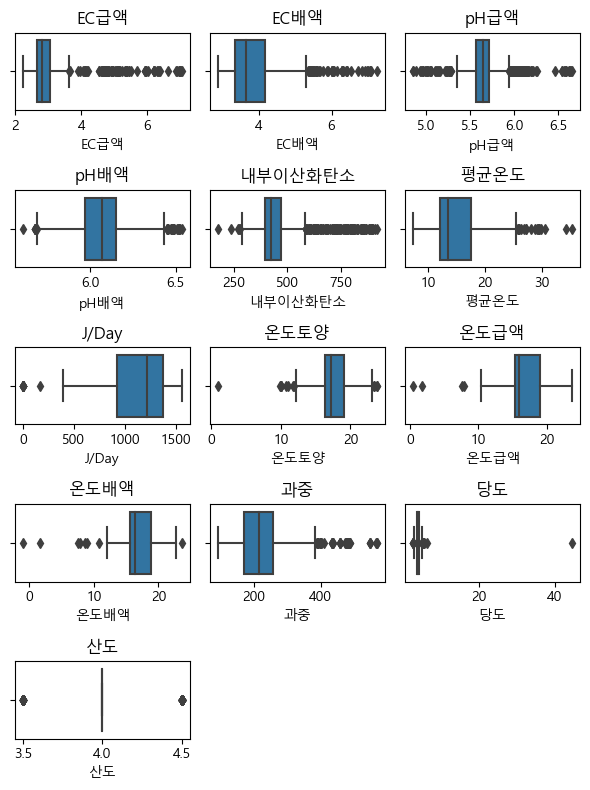

In [25]:
# boxplot 이상치 확인
plt.figure(figsize = (6, 8))
for i in range(len(tom_origin.columns)):
    plt.subplot(5, 3, i+1)
    sns.boxplot(tom_origin[tom_origin.columns[i]])
    plt.title(tom_origin.columns[i])
plt.tight_layout()

In [26]:
print(tom_origin.isnull().sum())
print("----------------------------")
print(tom_origin.notnull().sum())

EC급액        187
EC배액        187
pH급액        187
pH배액        187
내부이산화탄소     187
평균온도        187
J/Day       820
온도토양        279
온도급액       1039
온도배액       1039
과중            0
당도            0
산도            0
dtype: int64
----------------------------
EC급액       1009
EC배액       1009
pH급액       1009
pH배액       1009
내부이산화탄소    1009
평균온도       1009
J/Day       376
온도토양        917
온도급액        157
온도배액        157
과중         1196
당도         1196
산도         1196
dtype: int64


### 환경데이터 셋
- 급액 ph : (5.0이하 / 6.5이상 = 토마토 x)
- 배액 PH : (4.5이하 / 7.0이상 / 식물 X)
- 급액 ec : 2.5 ~ 3.5 적정
- 배액 ec : 3.5 ~ 4.5 적정
- co2 : 397 ~ 586
- 평균온도 : (10도 이하 / 30도 넘어가는 환경이 없음)
- 누적일사량 : 600 ~ 1300

### 환경데이터 셋 two
- J/Day : 600 ~ 1300
- 평균온도 :  17.4 ~    15 ~ 30도로 유지해야함
- EC 급액 : 2.5 ~ 3.5
- EC 배액 : 3.5 ~ 5.0
- pH 급액 : 5.2 ~ 5.9 or  ## 6.0 ~ 6.5 가 적절하다고 여김 
- pH 배액 : 5.0 ~ 7.0
- 이산화탄소농도 : 400 ~ 600
- 온도토양 : 15 ~ 25
- 온도급액 : 15 ~ 30
- 온도배액 : 15 ~ 30

In [27]:
# 환경데이터 셋에 맞추어 이상치 값 확인

In [28]:
# 사전확인
print(len(tom_origin[(tom_origin["pH급액"] <= 6.5) & (tom_origin["pH급액"] >= 5.0)]))
print("-----------------------------------------------------------------------------")
print(len(tom_origin[tom_origin["pH급액"] <= 5.0]))
print(len(tom_origin[tom_origin["pH급액"] >= 6.5]))

988
-----------------------------------------------------------------------------
10
11


In [29]:
# 사전확인
print(len(tom_origin[(tom_origin["pH배액"] <= 7.0) & (tom_origin["pH배액"] >= 4.5)]))
print("-----------------------------------------------------------------------------")
print(len(tom_origin[tom_origin["pH배액"] <= 4.5]))
print(len(tom_origin[tom_origin["pH배액"] >= 7.0]))

1009
-----------------------------------------------------------------------------
0
0


In [30]:
print(len(tom_origin[(tom_origin["EC급액"] <= 3.5) & (tom_origin["EC급액"] >= 2.5)]))
print("-----------------------------------------------------------------------------")
print(len(tom_origin[tom_origin["EC급액"] <= 2.5]))
print(len(tom_origin[tom_origin["EC급액"] >= 3.5]))

800
-----------------------------------------------------------------------------
122
87


In [31]:
print(len(tom_origin[(tom_origin["EC배액"] <= 4.5) & (tom_origin["EC배액"] >= 3.5)]))
print("-----------------------------------------------------------------------------")
print(len(tom_origin[tom_origin["EC배액"] <= 3.5]))
print(len(tom_origin[tom_origin["EC배액"] >= 4.5]))

435
-----------------------------------------------------------------------------
386
190


In [32]:
print(len(tom_origin[(tom_origin["내부이산화탄소"] <= 586) & (tom_origin["내부이산화탄소"] >= 397)]))
print("-----------------------------------------------------------------------------")
print(len(tom_origin[tom_origin["내부이산화탄소"] <= 397]))
print(len(tom_origin[tom_origin["내부이산화탄소"] >= 586]))

615
-----------------------------------------------------------------------------
275
120


In [33]:
print(len(tom_origin[(tom_origin["평균온도"] <= 20.3) & (tom_origin["평균온도"] >= 17.5)]))
print("-----------------------------------------------------------------------------")
print(len(tom_origin[tom_origin["평균온도"] <= 17.5]))
print(len(tom_origin[tom_origin["평균온도"] >= 20.3]))

108
-----------------------------------------------------------------------------
755
146


In [34]:
print(len(tom_origin[(tom_origin["J/Day"] <= 1270) & (tom_origin["J/Day"] >= 600)]))
print("-----------------------------------------------------------------------------")
print(len(tom_origin[tom_origin["J/Day"] <= 600]))
print(len(tom_origin[tom_origin["J/Day"] >= 1300]))

183
-----------------------------------------------------------------------------
52
120


### * 참고
- tom1 GPS 정보:  35°36'0.95",  127°30'23.87" 코멘트: Jeollabuk-do Jangsu null Jangsu-eup 
- tom2 GPS 정보:  35°35'37.93",  127°30'28.94" 코멘트: Jeollabuk-do Jangsu null Jangsu-eup
- tom3 GPS 정보:  35°36'48.49",  127°26'43.47" 코멘트: Jeollabuk-do Jangsu null Jangsu-eup
- tom4 GPS 정보:  35°45'6.63",  129°11'5.14" 코멘트: Gyeongsangbuk-do Gyeongju null Naenam-myeon
- tom5 GPS 정보:  35°58'34.03",  129°16'27.04" 코멘트: Gyeongsangbuk-do Gyeongju null Gangdong-myeon
- tom6 GPS 정보:  35°4'4.13",  127°55'37.10" 코멘트: Gyeongsangnam-do Sacheon null Gonyang-myeon

#### 이상치 확인결과
- BOXPLOT과 환경데이터 셋의 공통컬럼 비교해 봤을 때, PH급액/PH배액/EC급액/EC배액/CO2 컬럼에 대해 상한 이상치 이상 데이터 삭제조치
- J/Day, 온도토양, 온도급액, 온도배액 : 특이점 이상치만 제거(차이가 많이 나는)
- 과중, 당도, 산도 : 특이점 이상치 행 제거

In [35]:
# 1) EC급액, EC배액, CO2, PH급액, ph배액
tom_origin.loc[tom_origin["EC급액"] >= 3.5, "EC급액"] = None
tom_origin.loc[tom_origin["EC배액"] >= 4.5, "EC배액"] = None
tom_origin.loc[(tom_origin["내부이산화탄소"] >= 586) | (tom_origin["내부이산화탄소"] <= 397), "내부이산화탄소"] = None
tom_origin.loc[(tom_origin["pH급액"] >= 6.5) | (tom_origin["pH급액"] <= 5.0), "pH급액"] = None

In [36]:
# 2) J/Day, 온도토양, 온도급액, 온도배액

# J/Day : "0"값 15개 null값으로 변경
# tom_origin["J/Day"].value_counts().sort_index()
tom_origin.loc[tom_origin["J/Day"] < 600, "J/Day"] = None

# 온도토양 : "10도 이하" null값으로 변경
# tom_origin["온도토양"].value_counts().sort_index()
tom_origin.loc[tom_origin["온도토양"] <= 10, "온도토양"] = None

# 평균온도 : "10도이하, 30도 이상" null값으로 변경
tom_origin.loc[(tom_origin["평균온도"] <= 10) | (tom_origin["평균온도"] >= 30), "평균온도"] = None

# 온도급액 : "10도이하"  null값으로 변경
# tom_origin["온도급액"].value_counts().sort_index()
tom_origin.loc[tom_origin["온도급액"] <= 10, "온도급액"] = None

# 온도배액 : "10도이하"  null값으로 변경
# tom_origin["온도배액"].value_counts().sort_index()
tom_origin.loc[tom_origin["온도배액"] <= 10 , "온도배액"] = None

In [37]:
# 3) 과중, 당도, 산도 

# 과중 : 변동없음 유지
# tom_origin["과중"].value_counts().sort_index(ascending = False)

# 당도 : "44.5" -> "4.5" 변경 / 콜라 당도 11임을 고려 존재 할 수 없는 토마토
# tom_origin["당도"].value_counts().sort_index(ascending = False)
tom_origin.loc[tom_origin["당도"] == tom_origin["당도"].max(), "당도"] = 4.5

# 산도 : 변동없음 유지
# tom_origin["산도"].value_counts().sort_index(ascending = False)

In [38]:
tom_origin

,EC급액,EC배액,pH급액,pH배액,내부이산화탄소,평균온도,J/Day,온도토양,온도급액,온도배액,과중,당도,산도
1,NaN,NaN,NaN,NaN,NaN,NaN,1084.0,NaN,NaN,NaN,205,4.1,4
2,NaN,NaN,NaN,NaN,NaN,NaN,1560.0,NaN,NaN,NaN,210,4.7,4
3,NaN,NaN,5.790770,5.964696,447.099476,17.157853,NaN,NaN,NaN,NaN,205,4.7,4
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206,4.7,4.5
5,NaN,NaN,5.507815,5.877543,NaN,19.302370,NaN,NaN,NaN,NaN,223,4.3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,2.444833,3.705833,5.606667,6.172000,NaN,12.558330,NaN,20.227000,NaN,NaN,148,4.5,4
93,2.412500,3.646833,5.630167,6.194500,NaN,11.533392,NaN,19.312000,NaN,NaN,142,4.6,4
94,2.400000,3.621500,5.631667,6.206333,NaN,11.117323,NaN,18.660667,NaN,NaN,151,4.5,3.5
95,2.392500,3.611667,5.647167,6.193000,NaN,10.976980,NaN,18.066833,NaN,NaN,145,4.3,3.5


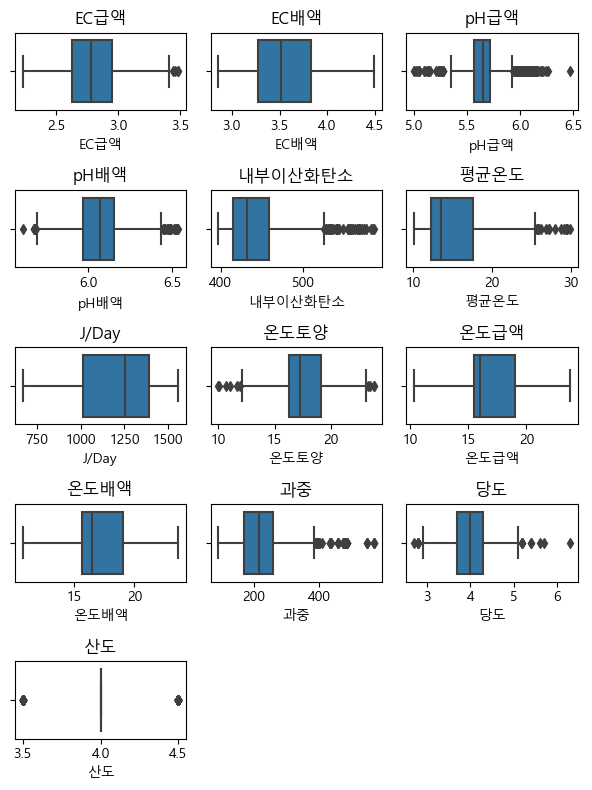

In [39]:
# boxplot 이상치 확인
plt.figure(figsize = (6, 8))
for i in range(len(tom_origin.columns)):
    plt.subplot(5, 3, i+1)
    sns.boxplot(tom_origin[tom_origin.columns[i]])
    plt.title(tom_origin.columns[i])
plt.tight_layout()

### 원본데이터 checkpoint

In [40]:
tom_origin.to_csv("tomato_farm_set/tom_origin.csv", encoding = "utf-8")

In [41]:
# R분석을 위한 결측치 0값 채우기
tom_origin_zero = tom_origin.fillna(0)
tom_origin_zero.to_csv("tomato_farm_set/tom_origin_zero.csv", encoding = "utf-8")

### 정규화 해볼까?

In [42]:
X = tom_origin[tom_origin.columns[:-3]]
y = tom_origin[tom_origin.columns[-3:]]
scaler = StandardScaler()
tom_ori_X_scaler = scaler.fit_transform(X)
tom_ori_X_scaler = pd.DataFrame(tom_ori_X_scaler, columns = tom_origin.columns[:-3])

In [43]:
tom_ori_X_scaler

,EC급액,EC배액,pH급액,pH배액,내부이산화탄소,평균온도,J/Day,온도토양,온도급액,온도배액
0,NaN,NaN,NaN,NaN,NaN,NaN,-0.541077,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,1.562223,NaN,NaN,NaN
2,NaN,NaN,0.727591,-0.677590,0.051452,0.460302,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,-0.866606,-1.250716,NaN,0.993648,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1191,-1.366936,0.370021,-0.309665,0.685658,NaN,-0.683611,NaN,1.334323,NaN,NaN
1192,-1.493059,0.214755,-0.177264,0.833620,NaN,-0.938516,NaN,0.860086,NaN,NaN
1193,-1.541818,0.148088,-0.168812,0.911437,NaN,-1.041993,NaN,0.522504,NaN,NaN
1194,-1.571074,0.122210,-0.081484,0.823756,NaN,-1.076897,NaN,0.214725,NaN,NaN


In [44]:
y = y.reset_index()
del y["index"]

### 원본데이터 scale Checkpoint

In [45]:
tom_ori_scaler = pd.concat([tom_ori_X_scaler, y], axis = 1)
tom_ori_scaler

,EC급액,EC배액,pH급액,pH배액,내부이산화탄소,평균온도,J/Day,온도토양,온도급액,온도배액,과중,당도,산도
0,NaN,NaN,NaN,NaN,NaN,NaN,-0.541077,NaN,NaN,NaN,205,4.1,4
1,NaN,NaN,NaN,NaN,NaN,NaN,1.562223,NaN,NaN,NaN,210,4.7,4
2,NaN,NaN,0.727591,-0.677590,0.051452,0.460302,NaN,NaN,NaN,NaN,205,4.7,4
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206,4.7,4.5
4,NaN,NaN,-0.866606,-1.250716,NaN,0.993648,NaN,NaN,NaN,NaN,223,4.3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1191,-1.366936,0.370021,-0.309665,0.685658,NaN,-0.683611,NaN,1.334323,NaN,NaN,148,4.5,4
1192,-1.493059,0.214755,-0.177264,0.833620,NaN,-0.938516,NaN,0.860086,NaN,NaN,142,4.6,4
1193,-1.541818,0.148088,-0.168812,0.911437,NaN,-1.041993,NaN,0.522504,NaN,NaN,151,4.5,3.5
1194,-1.571074,0.122210,-0.081484,0.823756,NaN,-1.076897,NaN,0.214725,NaN,NaN,145,4.3,3.5


In [46]:
tom_ori_scaler.to_csv("tomato_farm_set/tom_ori_scaler.csv", encoding = "utf-8")

## 2) Simple imputer

In [47]:
# mean
import numpy as np
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
tom_mean = imputer.fit_transform(tom_origin)
tom_mean = pd.DataFrame(tom_mean, columns = tom_origin.columns)
tom_mean

,EC급액,EC배액,pH급액,pH배액,내부이산화탄소,평균온도,J/Day,온도토양,온도급액,온도배액,과중,당도,산도
0,2.795266,3.565228,5.661629,6.067735,444.924483,15.307040,1084.00000,17.652540,16.985955,17.140521,205.0,4.1,4.0
1,2.795266,3.565228,5.661629,6.067735,444.924483,15.307040,1560.00000,17.652540,16.985955,17.140521,210.0,4.7,4.0
2,2.795266,3.565228,5.790770,5.964696,447.099476,17.157853,1206.45175,17.652540,16.985955,17.140521,205.0,4.7,4.0
3,2.795266,3.565228,5.661629,6.067735,444.924483,15.307040,1206.45175,17.652540,16.985955,17.140521,206.0,4.7,4.5
4,2.795266,3.565228,5.507815,5.877543,444.924483,19.302370,1206.45175,17.652540,16.985955,17.140521,223.0,4.3,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1191,2.444833,3.705833,5.606667,6.172000,444.924483,12.558330,1206.45175,20.227000,16.985955,17.140521,148.0,4.5,4.0
1192,2.412500,3.646833,5.630167,6.194500,444.924483,11.533392,1206.45175,19.312000,16.985955,17.140521,142.0,4.6,4.0
1193,2.400000,3.621500,5.631667,6.206333,444.924483,11.117323,1206.45175,18.660667,16.985955,17.140521,151.0,4.5,3.5
1194,2.392500,3.611667,5.647167,6.193000,444.924483,10.976980,1206.45175,18.066833,16.985955,17.140521,145.0,4.3,3.5


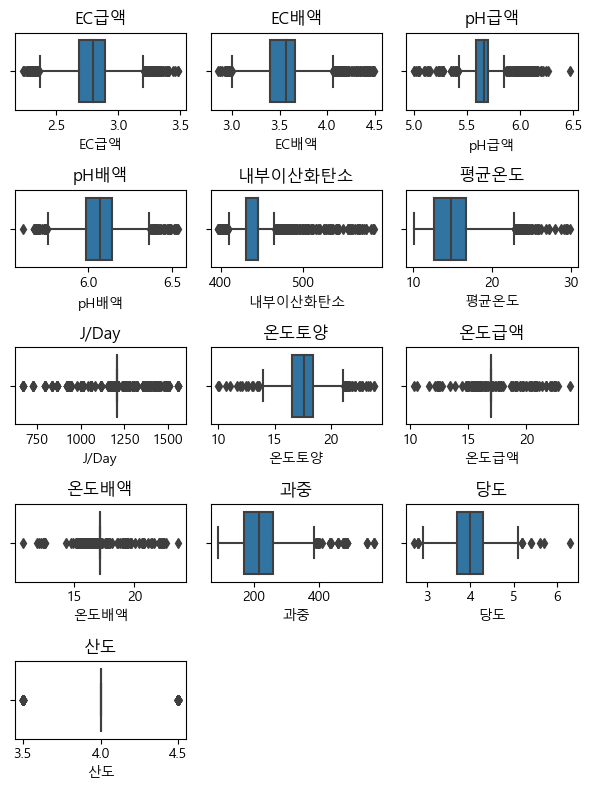

In [48]:
# boxplot 이상치 확인
plt.figure(figsize = (6, 8))
for i in range(len(tom_mean.columns)):
    plt.subplot(5, 3, i+1)
    sns.boxplot(tom_mean[tom_mean.columns[i]])
    plt.title(tom_mean.columns[i])
plt.tight_layout()

In [49]:
# median
import numpy as np
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
tom_median = imputer.fit_transform(tom_origin)
tom_median = pd.DataFrame(tom_median, columns = tom_origin.columns)
tom_median

,EC급액,EC배액,pH급액,pH배액,내부이산화탄소,평균온도,J/Day,온도토양,온도급액,온도배액,과중,당도,산도
0,2.780000,3.517833,5.650167,6.070500,431.425000,13.594894,1084.0,17.257917,16.0395,16.490278,205.0,4.1,4.0
1,2.780000,3.517833,5.650167,6.070500,431.425000,13.594894,1560.0,17.257917,16.0395,16.490278,210.0,4.7,4.0
2,2.780000,3.517833,5.790770,5.964696,447.099476,17.157853,1254.0,17.257917,16.0395,16.490278,205.0,4.7,4.0
3,2.780000,3.517833,5.650167,6.070500,431.425000,13.594894,1254.0,17.257917,16.0395,16.490278,206.0,4.7,4.5
4,2.780000,3.517833,5.507815,5.877543,431.425000,19.302370,1254.0,17.257917,16.0395,16.490278,223.0,4.3,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1191,2.444833,3.705833,5.606667,6.172000,431.425000,12.558330,1254.0,20.227000,16.0395,16.490278,148.0,4.5,4.0
1192,2.412500,3.646833,5.630167,6.194500,431.425000,11.533392,1254.0,19.312000,16.0395,16.490278,142.0,4.6,4.0
1193,2.400000,3.621500,5.631667,6.206333,431.425000,11.117323,1254.0,18.660667,16.0395,16.490278,151.0,4.5,3.5
1194,2.392500,3.611667,5.647167,6.193000,431.425000,10.976980,1254.0,18.066833,16.0395,16.490278,145.0,4.3,3.5


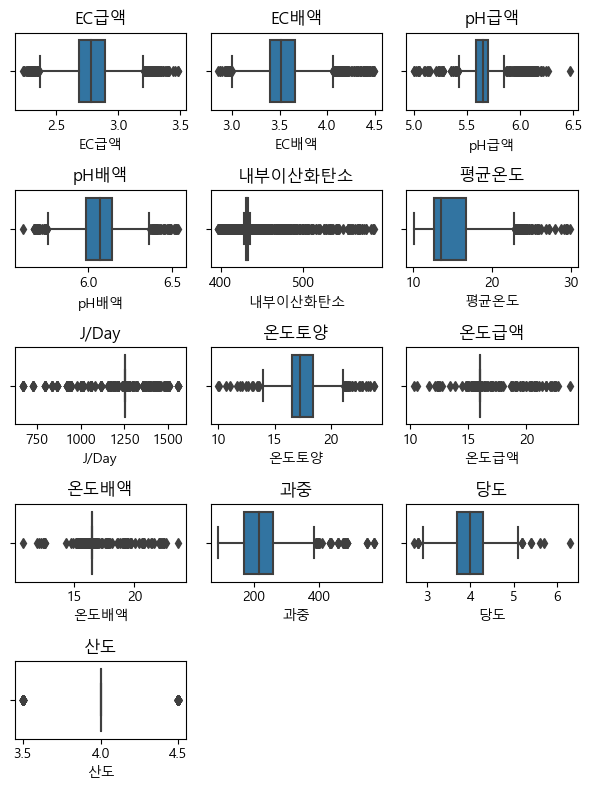

In [50]:
# boxplot 이상치 확인
plt.figure(figsize = (6, 8))
for i in range(len(tom_median.columns)):
    plt.subplot(5, 3, i+1)
    sns.boxplot(tom_median[tom_median.columns[i]])
    plt.title(tom_median.columns[i])
plt.tight_layout()

## 3) KNN imputer

In [51]:
from sklearn.impute import KNNImputer
tom_knn = []
for i in range(3, 10, 2):
    imputer_i = KNNImputer(n_neighbors=i)
    print("n_neighbors :", i)
    tom_knn.append(imputer_i.fit_transform(tom_origin))

n_neighbors : 3
n_neighbors : 5
n_neighbors : 7
n_neighbors : 9


In [52]:
# numpy를 DataFrame으로 변환 / 컬럼 재설정
tom_knn_list = []
for i in range(len(tom_knn)):
    cvt_tom = pd.DataFrame(tom_knn[i])
    cvt_tom.columns = ['EC급액', 'EC배액', 'pH급액', 'pH배액', '내부이산화탄소', '평균온도', 'J/Day', '온도토양',
       '온도급액', '온도배액', '과중', '당도', '산도']
    tom_knn_list.append(cvt_tom)

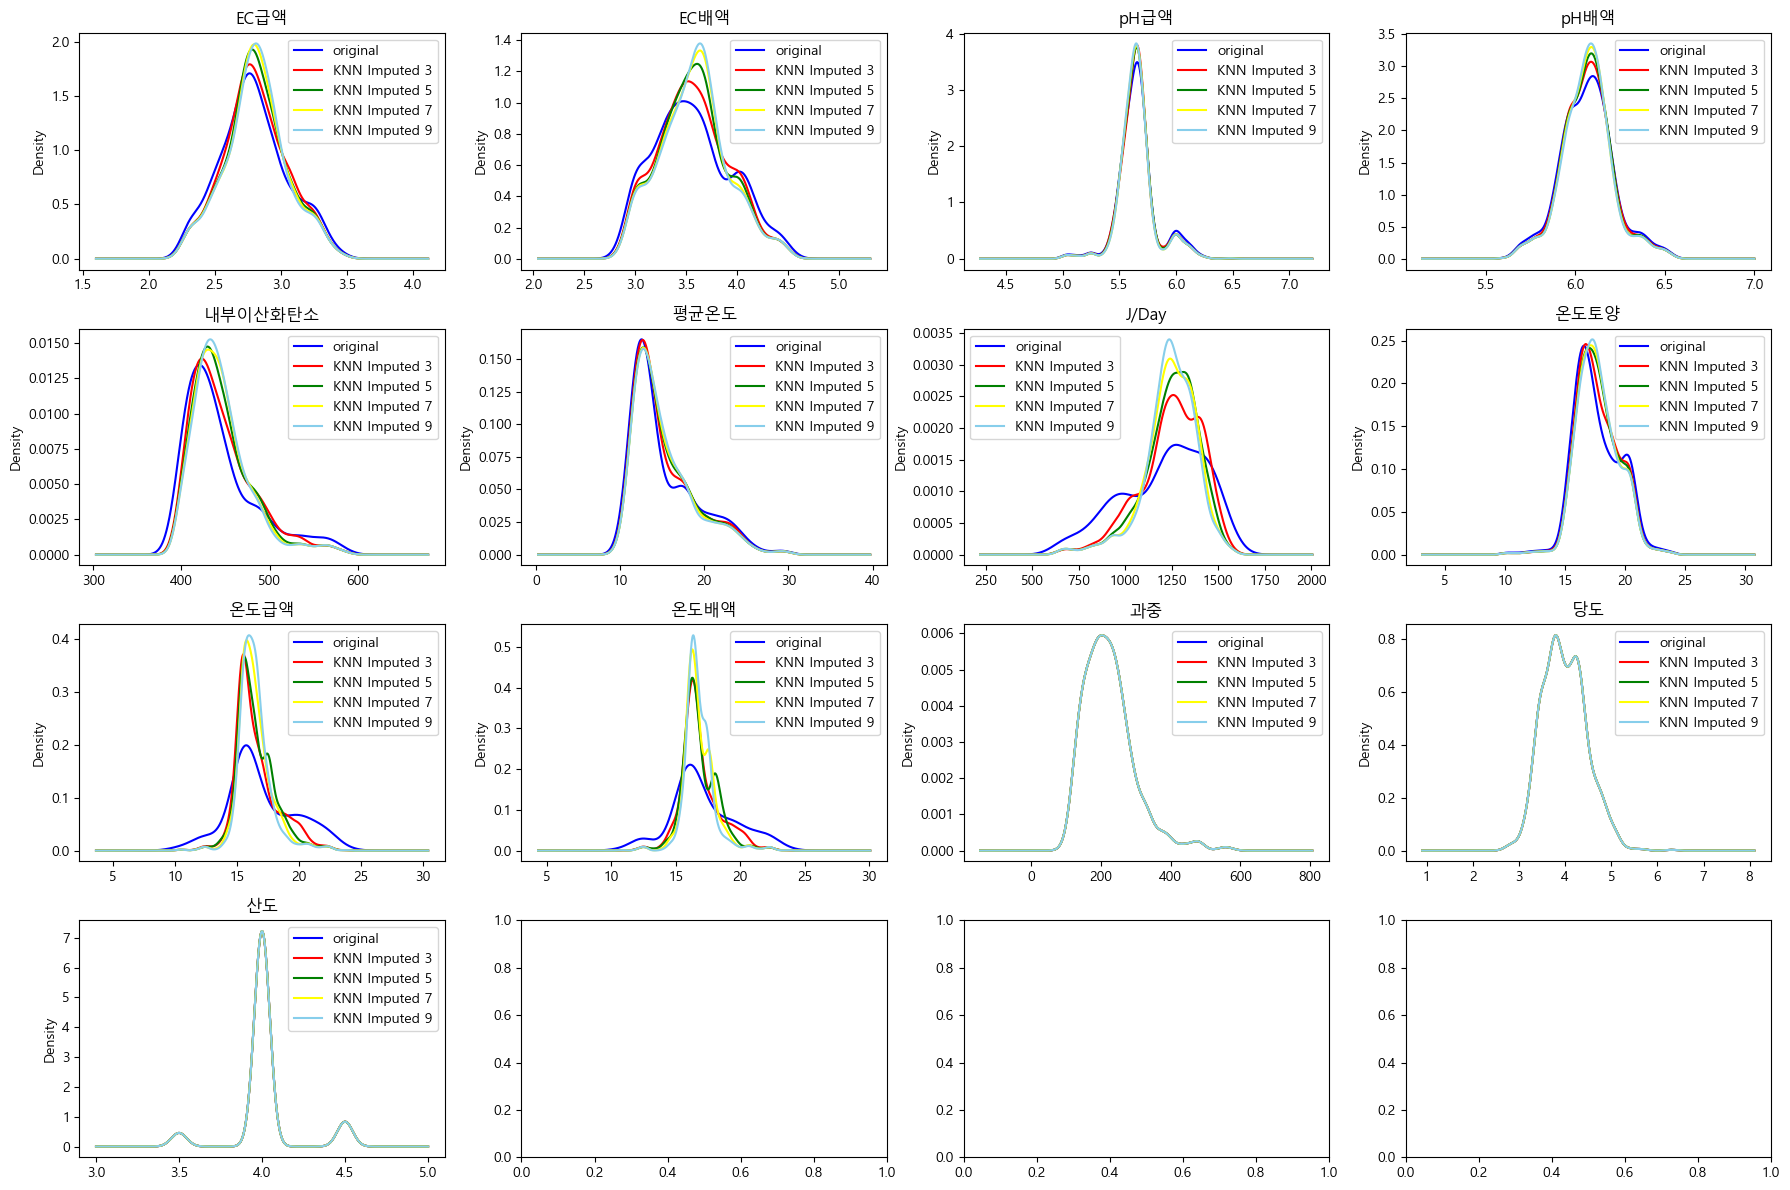

In [53]:
fig, axis = plt.subplots(nrows = 4, ncols = 4, figsize = (18, 12))

for i, (column1, column2, column3, column4, column5) in enumerate(zip(tom_origin.columns, tom_knn_list[0].columns,
                                          tom_knn_list[1].columns, tom_knn_list[2].columns,
                                          tom_knn_list[3].columns)):
    ax = axis[i//4, i%4]
    tom_origin[column1].plot(kind = "kde", ax = ax, color = "blue", label = 'original')
    tom_knn_list[0][column2].plot(kind = "kde", ax = ax, color = "red", label = "KNN Imputed 3")
    tom_knn_list[1][column3].plot(kind = "kde", ax = ax, color = "green", label = "KNN Imputed 5")
    tom_knn_list[2][column4].plot(kind = "kde", ax = ax, color = "yellow", label = "KNN Imputed 7")
    tom_knn_list[3][column5].plot(kind = "kde", ax = ax, color = "skyblue", label = "KNN Imputed 9")
    ax.set_title(column1)
    ax.legend()
    
plt.tight_layout()

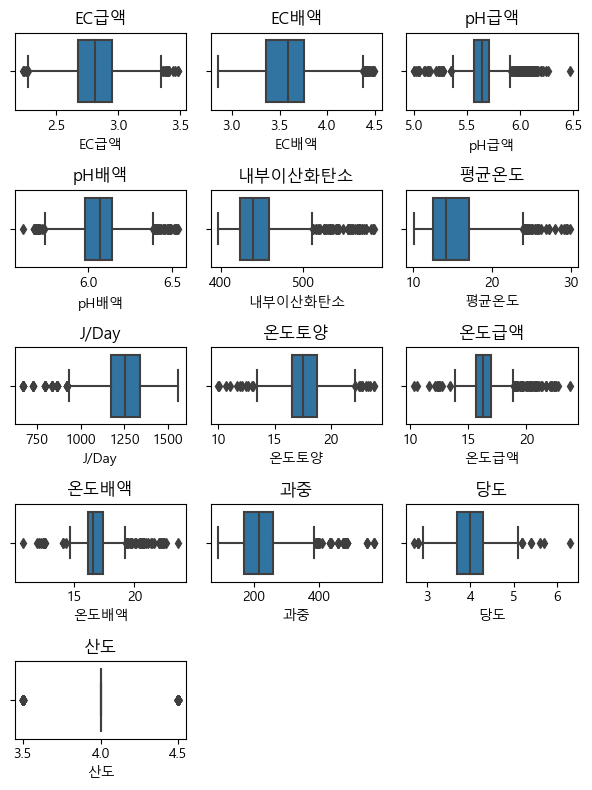

In [54]:
# boxplot 이상치 확인
plt.figure(figsize = (6, 8))
for i in range(len(tom_knn_list[3].columns)):
    plt.subplot(5, 3, i+1)
    sns.boxplot(tom_knn_list[3][tom_knn_list[3].columns[i]])
    plt.title(tom_knn_list[3].columns[i])
plt.tight_layout()

### KNN imputer Checkpoint

In [55]:
# neighbor 9 모델 저장
tom_knn_list[3].to_csv("tomato_farm_set/tom_knn.csv", encoding = "utf-8")

### KNN imputer scale Checkpoint

In [56]:
X = tom_knn_list[3][tom_knn_list[3].columns[:-3]]
y = tom_knn_list[3][tom_knn_list[3].columns[-3:]]
scaler = StandardScaler()
tom_knn_X_scaler = scaler.fit_transform(X)
tom_knn_X_scaler = pd.DataFrame(tom_knn_X_scaler, columns = tom_knn_list[3].columns[:-3])

In [57]:
tom_knn_scale = pd.concat([tom_knn_X_scaler, y], axis = 1)

In [58]:
tom_knn_scale.to_csv("tomato_farm_set/tom_knn_scale.csv", encoding = "utf-8")

## 4) Multivariate feature imputation

In [59]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imputer = IterativeImputer(max_iter=10000, random_state = 0)
tom_mul = imputer.fit_transform(tom_origin)
tom_mul

array([[  2.69930884,   3.6148463 ,   5.66350707, ..., 205.        ,
          4.1       ,   4.        ],
       [  2.892721  ,   3.54827682,   5.60402769, ..., 210.        ,
          4.7       ,   4.        ],
       [  2.63207059,   3.1932212 ,   5.79076963, ..., 205.        ,
          4.7       ,   4.        ],
       ...,
       [  2.4       ,   3.6215    ,   5.63166667, ..., 151.        ,
          4.5       ,   3.5       ],
       [  2.3925    ,   3.61166667,   5.64716667, ..., 145.        ,
          4.3       ,   3.5       ],
       [  2.38      ,   3.59766667,   5.65916667, ..., 220.        ,
          4.4       ,   4.        ]])

In [60]:
# numpy를 DataFrame으로 변환 / 컬럼 재설정
tom_mul = pd.DataFrame(tom_mul)
tom_mul.columns = ['EC급액', 'EC배액', 'pH급액', 'pH배액', '내부이산화탄소', '평균온도', 'J/Day', '온도토양',
   '온도급액', '온도배액', '과중', '당도', '산도']
tom_mul.head()

,EC급액,EC배액,pH급액,pH배액,내부이산화탄소,평균온도,J/Day,온도토양,온도급액,온도배액,과중,당도,산도
0,2.699309,3.614846,5.663507,6.076450,449.819007,16.354679,1084.000000,17.691973,17.565242,17.301227,205.0,4.1,4.0
1,2.892721,3.548277,5.604028,6.060794,428.420909,13.660482,1560.000000,17.928303,15.454350,15.059446,210.0,4.7,4.0
2,2.632071,3.193221,5.790770,5.964696,447.099476,17.157853,1235.226263,17.787897,17.428312,17.588889,205.0,4.7,4.0
3,2.802632,3.605703,5.622303,6.087159,441.006022,15.679266,1269.950669,18.087800,17.067158,16.885205,206.0,4.7,4.5
4,2.851205,3.534321,5.507815,5.877543,441.040683,19.302370,1191.956297,18.686372,19.744894,19.141385,223.0,4.3,4.0


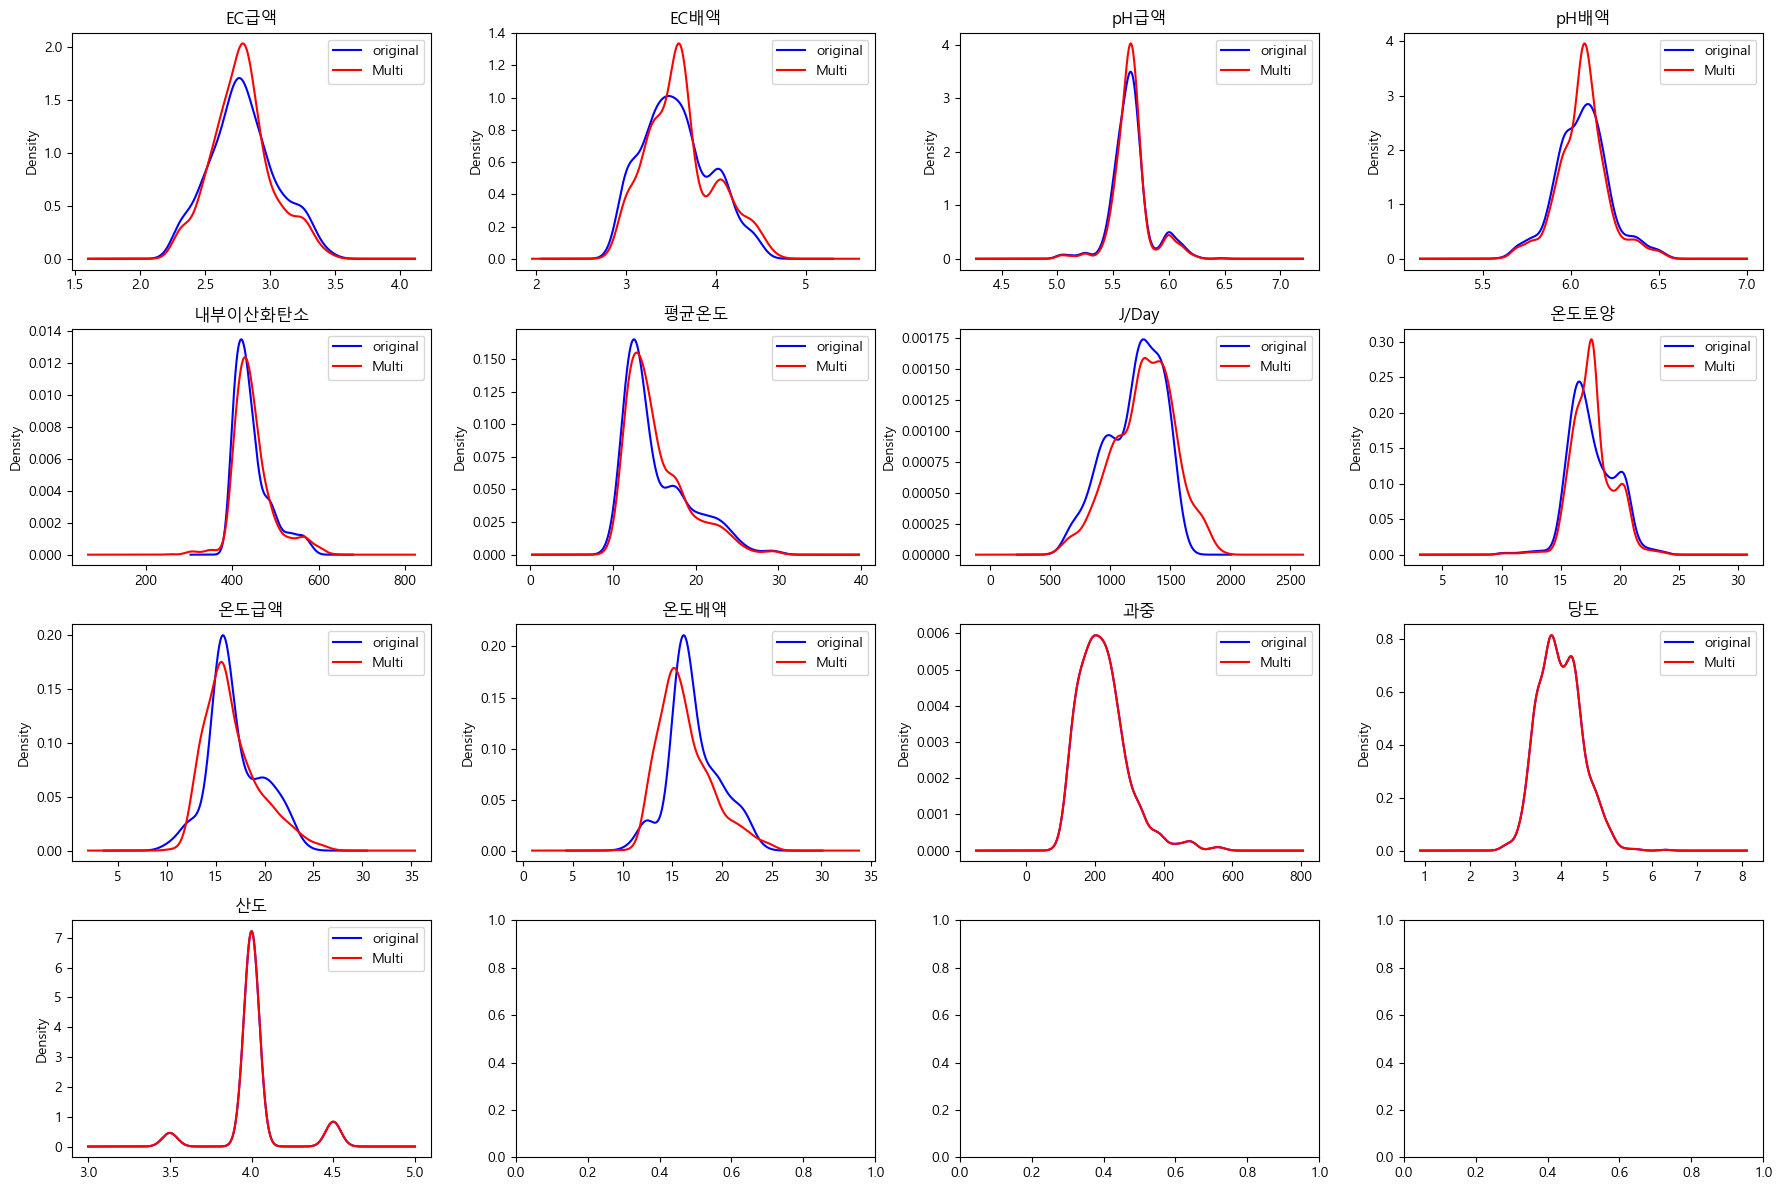

In [61]:
fig, axis = plt.subplots(nrows = 4, ncols = 4, figsize = (18, 12))

for i, (column1, column2) in enumerate(zip(tom_origin.columns, tom_mul.columns)):
    ax = axis[i//4, i%4]
    tom_origin[column1].plot(kind = "kde", ax = ax, color = "blue", label = 'original')
    tom_mul[column2].plot(kind = "kde", ax = ax, color = "red", label = "Multi")
    ax.set_title(column1)
    ax.legend()
    
plt.tight_layout()

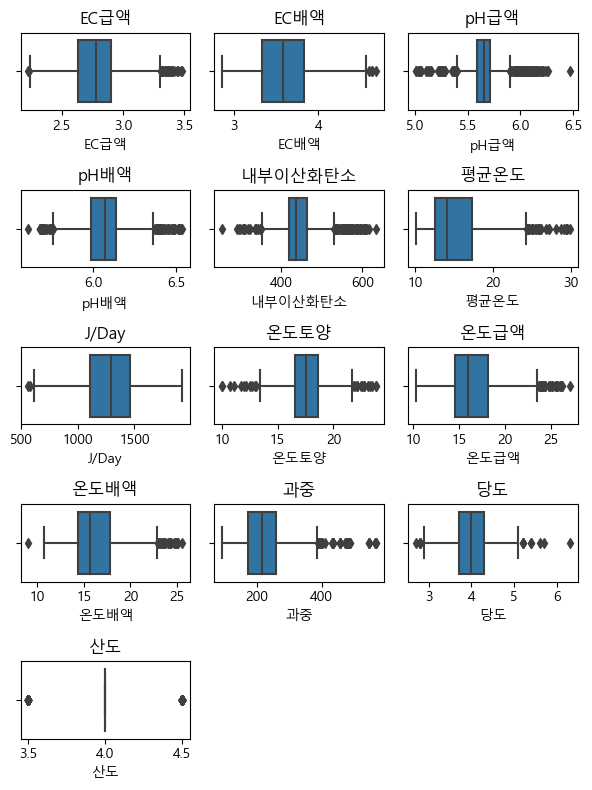

In [62]:
# boxplot 이상치 확인
plt.figure(figsize = (6, 8))
for i in range(len(tom_mul.columns)):
    plt.subplot(5, 3, i+1)
    sns.boxplot(tom_mul[tom_mul.columns[i]])
    plt.title(tom_mul.columns[i])
plt.tight_layout()

### Multi imputer Checkpoint

In [63]:
tom_mul.to_csv("tomato_farm_set/tom_mul.csv", encoding = "utf-8")

### Multi imputer scale Checkpoint

In [64]:
X = tom_mul[tom_mul.columns[:-3]]
y = tom_mul[tom_mul.columns[-3:]]
scaler = StandardScaler()
tom_mul_X_scaler = scaler.fit_transform(X)
tom_mul_X_scaler = pd.DataFrame(tom_mul_X_scaler, columns = tom_mul.columns[:-3])

In [65]:
tom_mul_scale = pd.concat([tom_mul_X_scaler, y], axis = 1)

In [66]:
tom_mul_scale.to_csv("tomato_farm_set/tom_mul_scale.csv", encoding = "utf-8")

## *데이터 재정립 
- 1번 j.day => 5번 j.day 채우기

In [67]:
farm1_unit = farm1[["날짜", "J/Day"]]
print(farm1_unit["날짜"].min(), "/", farm1_unit["날짜"].max())

2021-10-21 10:00:00 / 2021-11-28 05:00:00


In [68]:
print(farm5["날짜"].min(), "/", farm5["날짜"].max())

2021-11-10 12:00:00 / 2021-12-21 12:00:00


In [69]:
farm5_1 = farm5
del farm5_1["J/Day"]

In [70]:
pd.merge(farm1_unit, farm5_1, how = "inner") 

,날짜,J/Day,평균온도,EC급액,EC배액,pH급액,pH배액,내부이산화탄소,온도토양,온도급액,온도배액
0,2021-11-12 09:00:00,493.0,19.76,2.833915,5.083508,6.355830,5.863970,395.711111,14.403704,15.622685,15.298148
1,2021-11-12 10:00:00,493.0,22.49,2.957932,5.326913,6.076204,5.830677,335.569892,16.894489,17.831317,17.304435
2,2021-11-26 11:00:00,938.0,24.45,2.947751,4.186575,6.088612,6.234728,336.020408,15.014031,19.941327,19.682398
3,2021-11-26 12:00:00,938.0,28.09,3.070100,4.280876,6.078106,6.225169,297.725352,17.023768,22.205106,22.097271
4,2021-11-26 13:00:00,938.0,30.12,3.193433,4.354820,6.030326,6.209128,294.056738,19.374557,24.139628,24.050532
5,2021-11-26 14:00:00,938.0,28.80,3.233286,4.369753,6.043340,6.211624,288.382979,21.027482,24.500443,24.493351
6,2021-11-26 15:00:00,938.0,25.07,3.174275,4.317193,6.145977,6.232771,295.404580,21.906011,23.481393,23.826336
7,2021-11-26 16:00:00,938.0,20.23,3.003985,4.130806,6.278554,6.273719,312.410072,21.912770,20.975270,21.389838
8,2021-11-26 17:00:00,938.0,16.38,2.794959,3.858217,6.346084,6.297611,338.755725,21.066794,17.336355,17.924141
9,2021-11-26 18:00:00,938.0,13.51,2.623248,3.605762,6.374299,6.331293,360.653061,19.569303,14.225340,14.749150


In [71]:
farm1_c = farm1[farm1["J/Day"] != 0]
farm1_c[farm1_c['날짜'] > "2021-11-10"] # 1번 농장 0이 아닌 데이터 중에서 5번 농장 시작기간(11월 10일)에 맞게 119개 추출(5번 데이터 갯수)

,날짜,EC급액,EC배액,pH급액,pH배액,내부이산화탄소,평균온도,J/Day
136,2021-11-12 09:00:00,2.657813,4.502809,5.231713,5.901490,558.197452,19.132611,493.0
137,2021-11-12 10:00:00,5.086283,5.885853,5.507815,5.877543,657.323699,19.302370,493.0
138,2021-11-12 11:00:00,6.552251,6.045556,5.684585,5.891277,567.537234,16.932287,493.0
139,2021-11-12 12:00:00,6.997490,6.850585,5.732779,5.905137,628.121053,18.581105,493.0
140,2021-11-12 13:00:00,7.027407,6.914467,5.734755,5.909568,599.968750,17.476562,493.0
...,...,...,...,...,...,...,...,...
456,2021-11-28 01:00:00,4.650375,4.741851,5.651925,5.776258,526.306452,18.079409,1173.0
457,2021-11-28 02:00:00,4.641410,4.732820,5.652870,5.775793,533.027174,18.114946,1173.0
458,2021-11-28 03:00:00,4.637748,4.730881,5.652804,5.774788,540.508380,18.091229,1173.0
459,2021-11-28 04:00:00,4.633536,4.722147,5.654611,5.773257,549.405714,18.058000,1173.0


In [72]:
farm1_out = farm1_c[farm1_c['날짜'] > "2021-11-10"].iloc[0:119, :]
farm1_out["J/Day"].values
farm5_c = farm5

In [73]:
farm5_c["J/Day"] = farm1_out["J/Day"].values

## 5) 5번 농장 뿔리기?
- 각 컬럼마다 가지는 mean, std를 따르는 정규분포 난수 대입

In [74]:
dst1 = pd.concat(dst_tom_21, axis = 0)
dst2 = pd.concat(dst_tom_22, axis = 0)
dst_df = pd.concat([dst1, dst2], axis = 0)

In [75]:
farm5_c["날짜"] = pd.to_datetime(farm5_c["날짜"])

In [76]:
# farm5_c에 "주차" 컬럼 추가
week_list = []
for i in farm5_c["날짜"]:
    b = pd.to_datetime("2021-01-01")
    weeks = math.trunc((i - b).days / 7)
    if weeks <= 52:
        week_list.append(str(weeks).zfill(2))
    elif weeks > 52:
        week_list.append(str(weeks - 52).zfill(2))

In [77]:
farm5_c["주차"] = week_list

In [78]:
dst_df.index = np.arange(len(dst_df))
dst_df = dst_df.reset_index()

In [79]:
farm5_c = farm5_c.reset_index()

In [80]:
tom5_df = pd.concat([farm5_c, dst_df], axis = 1)
del tom5_df["index"]

In [81]:
del tom5_df["날짜"]

In [82]:
tom5_df.describe()
#          J/Day	 평균온도	 EC급액	   EC배액	        pH급액	pH배액	 내부이산화탄소	온도토양	온도급액	온도배액
# mean	921.829249	17.189244	2.745358	4.183593	6.383289	6.191583	391.681817	15.879518	15.599672	15.744600
# std	342.949775	5.395624	0.256896	0.692894	0.236881	0.305221	93.605860	3.260943	4.119580	4.061744
tom5_df.isnull().sum() # 1277개 값 정규분포 난수 넣기

평균온도       1277
EC급액       1277
EC배액       1277
pH급액       1277
pH배액       1277
내부이산화탄소    1277
온도토양       1277
온도급액       1277
온도배액       1277
J/Day      1277
주차         1277
주차            0
과중            0
당도            0
산도            0
dtype: int64

In [83]:
tom5_df.columns[:-5]

Index(['평균온도', 'EC급액', 'EC배액', 'pH급액', 'pH배액', '내부이산화탄소', '온도토양', '온도급액',
       '온도배액', 'J/Day'],
      dtype='object')

In [84]:
# 정규분포 난수 넣기
# np.random.normal(mean, std, size)
for col in tom5_df.columns[:-5]:
    tom5_df.loc[tom5_df[col].isnull() == True, col] = np.random.normal(tom5_df[col].mean(), tom5_df[col].std(), tom5_df[col].isnull().sum())

In [85]:
del tom5_df["주차"]

In [86]:
# 1) EC급액, EC배액, CO2, PH급액, ph배액
tom_origin.loc[tom_origin["EC급액"] >= 3.5, "EC급액"] = None
tom_origin.loc[tom_origin["EC배액"] >= 4.5, "EC배액"] = None
tom_origin.loc[(tom_origin["내부이산화탄소"] >= 586) | (tom_origin["내부이산화탄소"] <= 397), "내부이산화탄소"] = None
tom_origin.loc[(tom_origin["pH급액"] >= 6.5) | (tom_origin["pH급액"] <= 5.0), "pH급액"] = None

In [87]:
# 2) J/Day, 온도토양, 온도급액, 온도배액

# J/Day : "0"값 15개 null값으로 변경
# tom_origin["J/Day"].value_counts().sort_index()
tom_origin.loc[tom_origin["J/Day"] < 940, "J/Day"] = None

# 온도토양 : "10도 이하" null값으로 변경
# tom_origin["온도토양"].value_counts().sort_index()
tom_origin.loc[tom_origin["온도토양"] <= 10, "온도토양"] = None

# 평균온도 : "10도이하, 30도 이상" null값으로 변경
tom_origin.loc[(tom_origin["평균온도"] <= 10) | (tom_origin["평균온도"] >= 30), "평균온도"] = None

# 온도급액 : "10도이하"  null값으로 변경
# tom_origin["온도급액"].value_counts().sort_index()
tom_origin.loc[tom_origin["온도급액"] <= 10, "온도급액"] = None

# 온도배액 : "10도이하"  null값으로 변경
# tom_origin["온도배액"].value_counts().sort_index()
tom_origin.loc[tom_origin["온도배액"] <= 10 , "온도배액"] = None

In [88]:
# 3) 과중, 당도, 산도 

# 과중 : 변동없음 유지
# tom_origin["과중"].value_counts().sort_index(ascending = False)

# 당도 : "44.5" -> "4.5" 변경 / 콜라 당도 11임을 고려 존재 할 수 없는 토마토
# tom_origin["당도"].value_counts().sort_index(ascending = False)
tom_origin.loc[tom_origin["당도"] == tom_origin["당도"].max(), "당도"] = 4.5

# 산도 : 변동없음 유지
# tom_origin["산도"].value_counts().sort_index(ascending = False)

### 뿔린 5번 농장(난수 data 대입) Checkpoint

In [89]:
tom5_df.to_csv("tomato_farm_set/tom5_df.csv", encoding = "utf-8")

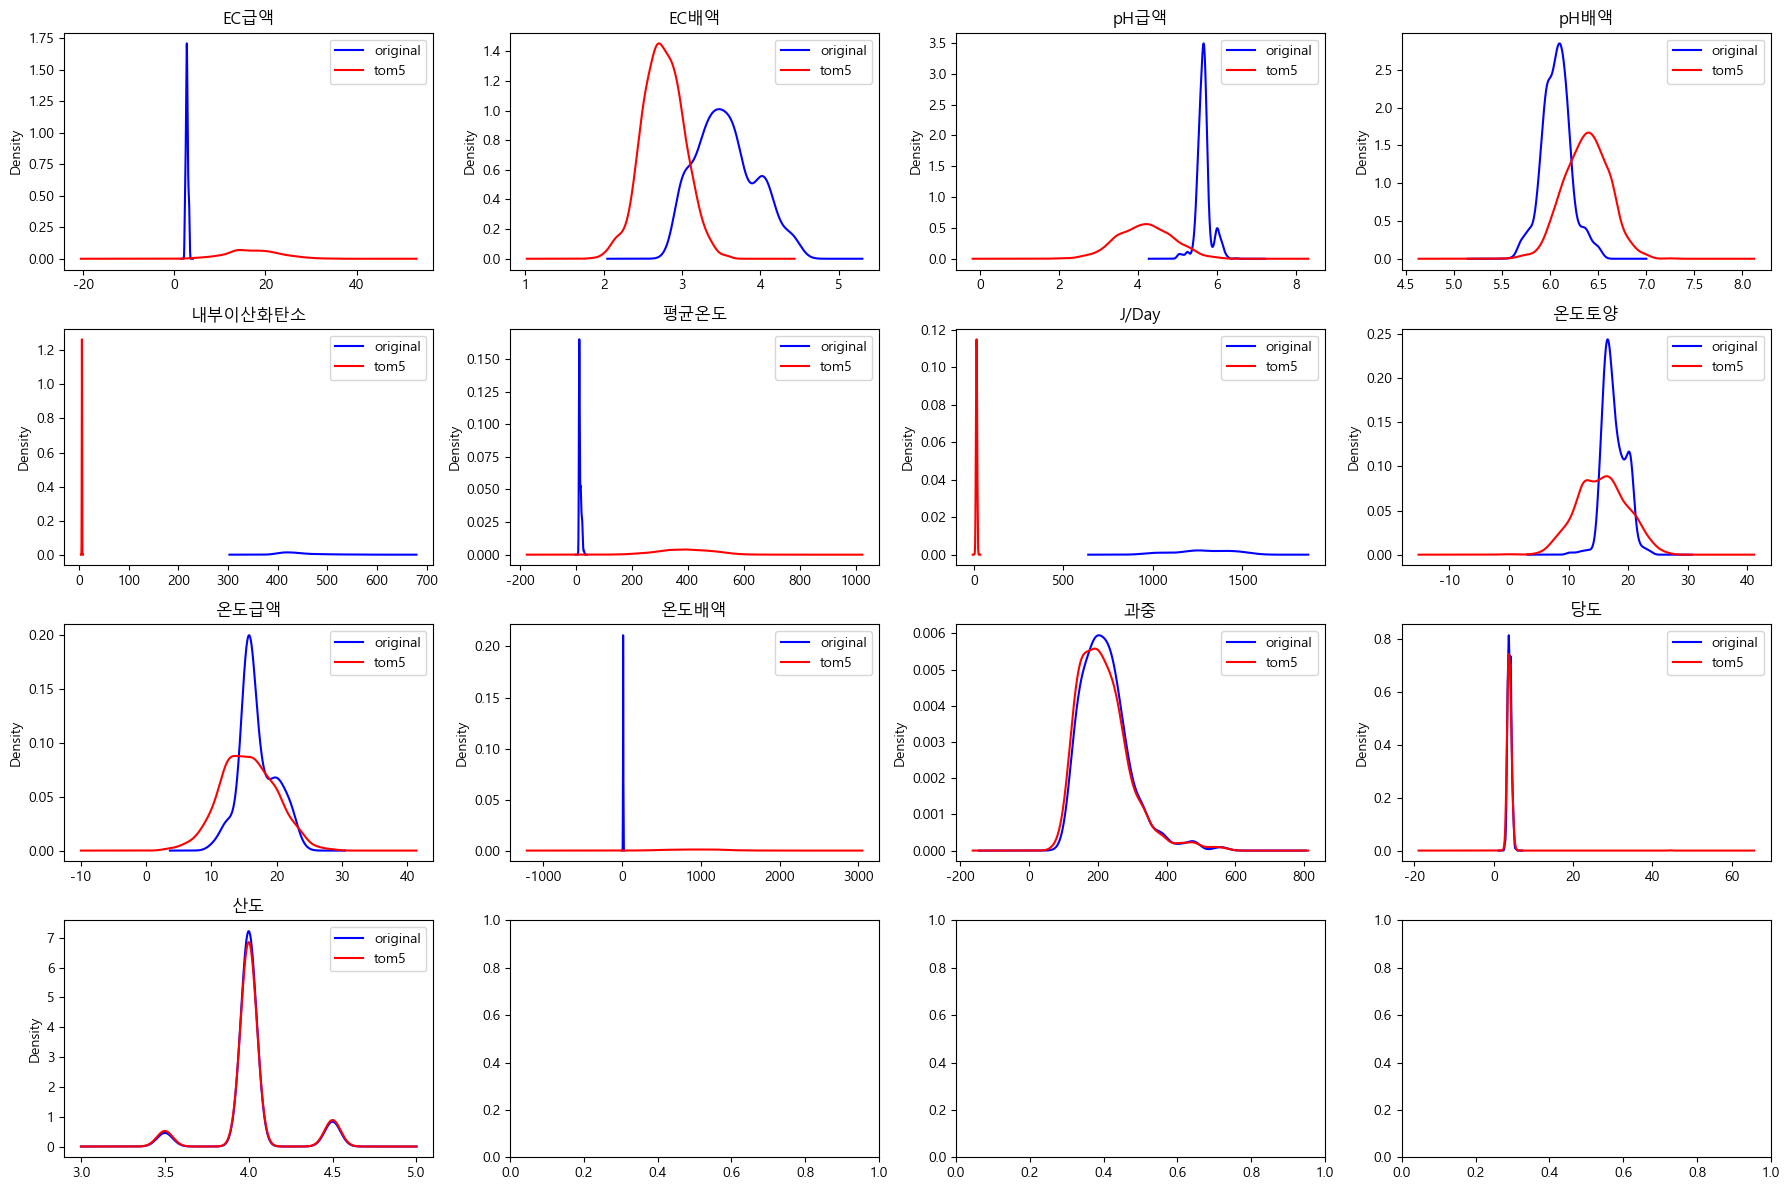

In [90]:
fig, axis = plt.subplots(nrows = 4, ncols = 4, figsize = (18, 12))

for i, (column1, column2) in enumerate(zip(tom_origin.columns, tom5_df.columns)):
    ax = axis[i//4, i%4]
    tom_origin[column1].plot(kind = "kde", ax = ax, color = "blue", label = 'original')
    tom5_df[column2].plot(kind = "kde", ax = ax, color = "red", label = "tom5")
    ax.set_title(column1)
    ax.legend()
    
plt.tight_layout()

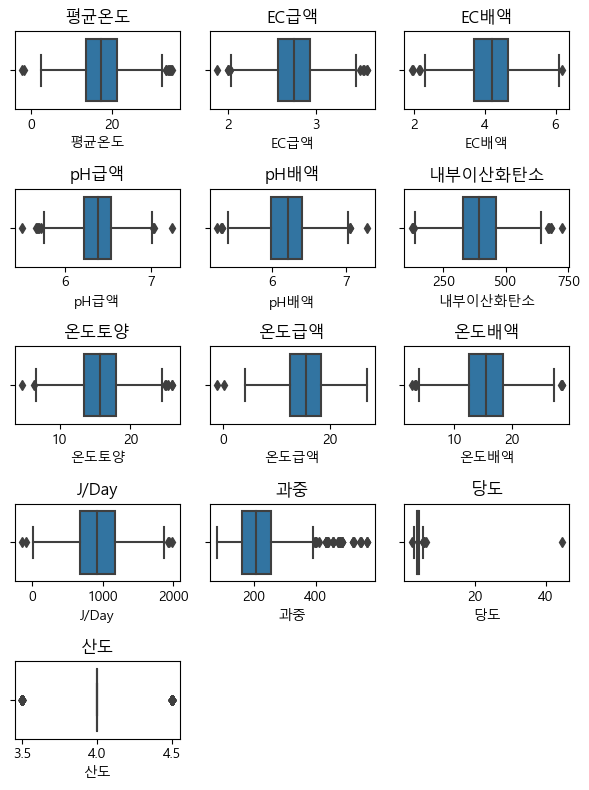

In [91]:
# boxplot 이상치 확인
plt.figure(figsize = (6, 8))
for i in range(len(tom5_df.columns)):
    plt.subplot(5, 3, i+1)
    sns.boxplot(tom5_df[tom5_df.columns[i]])
    plt.title(tom5_df.columns[i])
plt.tight_layout()

### 뿔린 5번 농장(난수 data 대입) scale Checkpoint

In [92]:
tom5_df

,평균온도,EC급액,EC배액,pH급액,pH배액,내부이산화탄소,온도토양,온도급액,온도배액,J/Day,과중,당도,산도
0,20.710000,3.134467,5.345276,6.111364,5.531808,356.139073,17.193709,18.699917,18.799669,493.000000,205,4.1,4
1,21.150000,3.149236,5.400007,6.116660,5.524146,306.430556,17.671007,19.032552,19.034722,493.000000,210,4.7,4
2,23.710000,3.215667,5.710990,6.044506,5.486429,226.488095,18.528274,20.564732,20.561756,493.000000,205,4.7,4
3,23.050000,3.269514,5.767596,6.022819,5.522604,180.885906,20.087668,21.296980,21.197567,493.000000,206,4.7,4.5
4,19.430000,3.140324,5.639355,6.027748,5.574041,194.619048,19.829082,19.525085,19.865646,493.000000,223,4.3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1391,15.239342,3.212816,4.688546,6.670626,6.305564,392.952391,16.226842,16.071575,12.412333,833.556969,81,3.9,4
1392,14.760667,3.055316,3.215275,6.572502,5.952079,514.892173,17.072040,16.156921,17.650674,713.952139,158,3.7,4
1393,14.241829,3.451850,3.882340,6.181869,5.967455,474.346514,15.282904,5.732718,16.096928,1560.605820,134,3.8,4.5
1394,22.482721,3.089178,4.504032,6.190063,7.002711,384.542459,19.008682,16.512742,11.784979,1059.168444,137,3.5,4.5


In [93]:
X = tom5_df[tom5_df.columns[:-3]]
y = tom5_df[tom5_df.columns[-3:]]
scaler = StandardScaler()
tom5_X_scaler = scaler.fit_transform(X)
tom5_X_scaler = pd.DataFrame(tom5_X_scaler, columns = tom5_df.columns[:-3])

In [94]:
tom5_scale = pd.concat([tom5_X_scaler, y], axis = 1)
tom5_scale

,평균온도,EC급액,EC배액,pH급액,pH배액,내부이산화탄소,온도토양,온도급액,온도배액,J/Day,과중,당도,산도
0,0.591044,1.427706,1.697166,-1.167518,-2.170977,-0.381092,0.437607,0.745236,0.762365,-1.247150,205,4.1,4
1,0.668908,1.483807,1.777124,-1.144480,-2.195926,-0.907493,0.584568,0.825506,0.818612,-1.247150,210,4.7,4
2,1.121934,1.736167,2.231447,-1.458373,-2.318740,-1.754064,0.848523,1.195248,1.184023,-1.247150,205,4.7,4
3,1.005138,1.940722,2.314144,-1.552720,-2.200946,-2.236980,1.328665,1.371952,1.336170,-1.247150,206,4.7,4.5
4,0.364531,1.449954,2.126794,-1.531275,-2.033458,-2.091550,1.249045,0.944363,1.017448,-1.247150,223,4.3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1391,-0.377062,1.725337,0.737733,1.265456,0.348518,0.008752,0.139906,0.110971,-0.766090,-0.249573,81,3.9,4
1392,-0.461770,1.127028,-1.414606,0.838587,-0.802494,1.300065,0.400145,0.131566,0.487417,-0.599925,158,3.7,4
1393,-0.553585,2.633378,-0.440074,-0.860798,-0.752426,0.870696,-0.150735,-2.383976,0.115614,1.880138,134,3.8,4.5
1394,0.904750,1.255662,0.468172,-0.825153,2.618560,-0.080307,0.996442,0.217432,-0.916212,0.411301,137,3.5,4.5


In [95]:
tom5_scale.to_csv("tomato_farm_set/tom5_scale.csv", encoding = "utf-8")

# 3. Model 구축 및 학습

## 1)  KNN

### (1) mean

In [209]:
# tom_mean
X = tom_mean[tom_mean.columns[:-3]]
y_w = tom_mean[tom_mean.columns[-3]]
y_s = tom_mean[tom_mean.columns[-2]]
y_p = tom_mean[tom_mean.columns[-1]]

In [210]:
# 데이터 분리
X_train, X_test, y_train_w, y_test_w = train_test_split(X, y_w, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_s, y_test_s = train_test_split(X, y_s, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_p, y_test_p = train_test_split(X, y_p, 
                                                        random_state=0,
                                                       test_size=0.2)

In [211]:
# scaling
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

In [219]:
from scipy.stats import randint, uniform
params = {"n_neighbors" : randint(low = 1, high = 11)}

# 과중
random_knn = RandomizedSearchCV(KNeighborsRegressor(), params, cv = 5, n_iter=10)
random_knn.fit(X_train_scaler, y_train_w)


pred = random_knn.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test_w, pred))

print("<과중>")
print("파라미터 : ", random_knn.best_params_)
print("점수 : ", random_knn.best_score_)
print("테스트 점수: ", random_knn.score(X_test, y_test_w))
print("rmse : ", rmse)

<과중>
파라미터 :  {'n_neighbors': 10}
점수 :  0.1067005650600156
테스트 점수:  -0.1031246621210431
rmse :  69.78665076502811


In [217]:
# 당도
random_knn = RandomizedSearchCV(KNeighborsRegressor(), params, cv = 5, n_iter=10)
random_knn.fit(X_train_scaler, y_train_s)

pred = random_knn.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test_s, pred))
print("<당도>")
print("파라미터 : ", random_knn.best_params_)
print("점수 : ", random_knn.best_score_)
print("테스트 점수: ", random_knn.score(X_test, y_test_s))
print("rmse : ", rmse)

<당도>
파라미터 :  {'n_neighbors': 10}
점수 :  0.32815481977436445
테스트 점수:  -0.27706928431531486
rmse :  0.5269962049199215


In [218]:
# 산도
random_knn = RandomizedSearchCV(KNeighborsRegressor(), params, cv = 5, n_iter=10)
random_knn.fit(X_train_scaler, y_train_p)

pred = random_knn.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test_p, pred))
print("<산도>")
print("파라미터 : ", random_knn.best_params_)
print("점수 : ", random_knn.best_score_)
print("테스트 점수: ", random_knn.score(X_test, y_test_p))
print("rmse : ", rmse)

<산도>
파라미터 :  {'n_neighbors': 8}
점수 :  -0.10128668608421329
테스트 점수:  -0.050415800415800405
rmse :  0.18136670093579288


### (2) median

In [158]:
# tom_median
X = tom_median[tom_median.columns[:-3]]
y_w = tom_median[tom_median.columns[-3]]
y_s = tom_median[tom_median.columns[-2]]
y_p = tom_median[tom_median.columns[-1]]

# 데이터 분리
X_train, X_test, y_train_w, y_test_w = train_test_split(X, y_w, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_s, y_test_s = train_test_split(X, y_s, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_p, y_test_p = train_test_split(X, y_p, 
                                                        random_state=0,
                                                       test_size=0.2)

# scaling
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

# 파라미터
params = {"n_neighbors" : randint(low = 1, high = 11)}

# 과중
random_knn = RandomizedSearchCV(KNeighborsRegressor(), params, cv = 5, n_iter=10)
random_knn.fit(X_train_scaler, y_train_w)

print("<과중>")
print("파라미터 : ", random_knn.best_params_)
print("훈련 점수 : ", random_knn.best_score_)
print("테스트 점수: ", random_knn.score(X_test, y_test_w))

# 당도
random_knn = RandomizedSearchCV(KNeighborsRegressor(), params, cv = 5, n_iter=10)
random_knn.fit(X_train_scaler, y_train_s)

print("<당도>")
print("파라미터 : ", random_knn.best_params_)
print("점수 : ", random_knn.best_score_)
print("테스트 점수: ", random_knn.score(X_test, y_test_s))

# 산도
random_knn = RandomizedSearchCV(KNeighborsRegressor(), params, cv = 5, n_iter=10)
random_knn.fit(X_train_scaler, y_train_p)

print("<산도>")
print("파라미터 : ", random_knn.best_params_)
print("점수 : ", random_knn.best_score_)
print("테스트 점수: ", random_knn.score(X_test, y_test_p))

<과중>
파라미터 :  {'n_neighbors': 10}
훈련 점수 :  0.10944495401157055
테스트 점수:  -0.06901449666105841
<당도>
파라미터 :  {'n_neighbors': 9}
점수 :  0.32919492435860853
테스트 점수:  -0.25924787285090134
<산도>
파라미터 :  {'n_neighbors': 10}
점수 :  -0.07883855420604613
테스트 점수:  -0.07309771309771285


### (3) knn imputer

In [152]:
# knn_imputer
X = tom_knn_scale[tom_knn_scale.columns[:-3]]
y_w = tom_knn_scale[tom_knn_scale.columns[-3]]
y_s = tom_knn_scale[tom_knn_scale.columns[-2]]
y_p = tom_knn_scale[tom_knn_scale.columns[-1]]

# 데이터 분리
X_train, X_test, y_train_w, y_test_w = train_test_split(X, y_w, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_s, y_test_s = train_test_split(X, y_s, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_p, y_test_p = train_test_split(X, y_p, 
                                                        random_state=0,
                                                       test_size=0.2)

# 파라미터
params = {"n_neighbors" : randint(low = 1, high = 11)}

# 과중
random_knn = RandomizedSearchCV(KNeighborsRegressor(), params, cv = 5, n_iter=10)
random_knn.fit(X_train, y_train_w)

print("<과중>")
print("파라미터 : ", random_knn.best_params_)
print("훈련 점수 : ", random_knn.best_score_)
print("테스트 점수: ", random_knn.score(X_test, y_test_w))
print("--------------------------------------------------------")

# 당도
random_knn = RandomizedSearchCV(KNeighborsRegressor(), params, cv = 5, n_iter=10)
random_knn.fit(X_train, y_train_s)

print("<당도>")
print("파라미터 : ", random_knn.best_params_)
print("훈련 점수 : ", random_knn.best_score_)
print("테스트 점수: ", random_knn.score(X_test, y_test_s))
print("--------------------------------------------------------")

# 산도
random_knn = RandomizedSearchCV(KNeighborsRegressor(), params, cv = 5, n_iter=10)
random_knn.fit(X_train, y_train_p)

print("<산도>")
print("파라미터 : ", random_knn.best_params_)
print("훈련 점수 : ", random_knn.best_score_)
print("테스트 점수: ", random_knn.score(X_test, y_test_p))

<과중>
파라미터 :  {'n_neighbors': 7}
훈련 점수 :  0.4097807968688455
테스트 점수:  0.4999168511024642
--------------------------------------------------------
<당도>
파라미터 :  {'n_neighbors': 9}
훈련 점수 :  0.2753874106001602
테스트 점수:  0.2693817775897468
--------------------------------------------------------
<산도>
파라미터 :  {'n_neighbors': 10}
훈련 점수 :  -0.11107747939693113
테스트 점수:  -0.1366320166320163


### (4) Multi imputer

In [156]:
# mul_imputer
X = tom_mul_scale[tom_mul_scale.columns[:-3]]
y_w = tom_mul_scale[tom_mul_scale.columns[-3]]
y_s = tom_mul_scale[tom_mul_scale.columns[-2]]
y_p = tom_mul_scale[tom_mul_scale.columns[-1]]

# 데이터 분리
X_train, X_test, y_train_w, y_test_w = train_test_split(X, y_w, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_s, y_test_s = train_test_split(X, y_s, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_p, y_test_p = train_test_split(X, y_p, 
                                                        random_state=0,
                                                       test_size=0.2)

# 파라미터
params = {"n_neighbors" : randint(low = 1, high = 11)}

# 과중
random_knn = RandomizedSearchCV(KNeighborsRegressor(), params, cv = 5, n_iter=10)
random_knn.fit(X_train, y_train_w)

print("<과중>")
print("파라미터 : ", random_knn.best_params_)
print("훈련 점수 : ", random_knn.best_score_)
print("테스트 점수: ", random_knn.score(X_test, y_test_w))
print("--------------------------------------------------------")

# 당도
random_knn = RandomizedSearchCV(KNeighborsRegressor(), params, cv = 5, n_iter=10)
random_knn.fit(X_train, y_train_s)

print("<당도>")
print("파라미터 : ", random_knn.best_params_)
print("훈련 점수 : ", random_knn.best_score_)
print("테스트 점수: ", random_knn.score(X_test, y_test_s))
print("--------------------------------------------------------")

# 산도
random_knn = RandomizedSearchCV(KNeighborsRegressor(), params, cv = 5, n_iter=10)
random_knn.fit(X_train, y_train_p)

print("<산도>")
print("파라미터 : ", random_knn.best_params_)
print("훈련 점수 : ", random_knn.best_score_)
print("테스트 점수: ", random_knn.score(X_test, y_test_p))

<과중>
파라미터 :  {'n_neighbors': 10}
훈련 점수 :  0.24620377438479787
테스트 점수:  0.30666868257086266
--------------------------------------------------------
<당도>
파라미터 :  {'n_neighbors': 8}
훈련 점수 :  0.3678328318586481
테스트 점수:  0.4042059651985974
--------------------------------------------------------
<산도>
파라미터 :  {'n_neighbors': 10}
훈련 점수 :  -0.06979030731626348
테스트 점수:  -0.14627858627858603


### (5) 5번 농장(난수 data 대입)

In [157]:
# mul_imputer
X = tom5_scale[tom5_scale.columns[:-3]]
y_w = tom5_scale[tom5_scale.columns[-3]]
y_s = tom5_scale[tom5_scale.columns[-2]]
y_p = tom5_scale[tom5_scale.columns[-1]]

# 데이터 분리
X_train, X_test, y_train_w, y_test_w = train_test_split(X, y_w, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_s, y_test_s = train_test_split(X, y_s, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_p, y_test_p = train_test_split(X, y_p, 
                                                        random_state=0,
                                                       test_size=0.2)

# 파라미터
params = {"n_neighbors" : randint(low = 1, high = 11)}

# 과중
random_knn = RandomizedSearchCV(KNeighborsRegressor(), params, cv = 5, n_iter=10)
random_knn.fit(X_train, y_train_w)

print("<과중>")
print("파라미터 : ", random_knn.best_params_)
print("훈련 점수 : ", random_knn.best_score_)
print("테스트 점수: ", random_knn.score(X_test, y_test_w))
print("--------------------------------------------------------")

# 당도
random_knn = RandomizedSearchCV(KNeighborsRegressor(), params, cv = 5, n_iter=10)
random_knn.fit(X_train, y_train_s)

print("<당도>")
print("파라미터 : ", random_knn.best_params_)
print("훈련 점수 : ", random_knn.best_score_)
print("테스트 점수: ", random_knn.score(X_test, y_test_s))
print("--------------------------------------------------------")

# 산도
random_knn = RandomizedSearchCV(KNeighborsRegressor(), params, cv = 5, n_iter=10)
random_knn.fit(X_train, y_train_p)

print("<산도>")
print("파라미터 : ", random_knn.best_params_)
print("훈련 점수 : ", random_knn.best_score_)
print("테스트 점수: ", random_knn.score(X_test, y_test_p))

<과중>
파라미터 :  {'n_neighbors': 10}
훈련 점수 :  -0.0955939662098669
테스트 점수:  -0.09483084318438384
--------------------------------------------------------
<당도>
파라미터 :  {'n_neighbors': 8}
훈련 점수 :  -1.358324917432905
테스트 점수:  -2.38623480582285
--------------------------------------------------------
<산도>
파라미터 :  {'n_neighbors': 7}
훈련 점수 :  -0.16692008040166845
테스트 점수:  -0.09655419956927513


## 2) Linear

### (1) mean

In [170]:
# tom_mean
X = tom_mean[tom_mean.columns[:-3]]
y_w = tom_mean[tom_mean.columns[-3]]
y_s = tom_mean[tom_mean.columns[-2]]
y_p = tom_mean[tom_mean.columns[-1]]

# 데이터 분리
X_train, X_test, y_train_w, y_test_w = train_test_split(X, y_w, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_s, y_test_s = train_test_split(X, y_s, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_p, y_test_p = train_test_split(X, y_p, 
                                                        random_state=0,
                                                       test_size=0.2)

# scaling
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

# 과중
linear_model = LinearRegression()
linear_model.fit(X_train_scaler, y_train_w)

print("<과중>")
print("훈련 점수 : ", linear_model.score(X_train_scaler, y_train_w))
print("테스트 점수: ", linear_model.score(X_test_scaler, y_test_w))
print("----------------------------------------------------")

# 당도
linear_model = LinearRegression()
linear_model.fit(X_train_scaler, y_train_s)

print("<당도>")
print("훈련 점수 : ", linear_model.score(X_train_scaler, y_train_s))
print("테스트 점수: ", linear_model.score(X_test_scaler, y_test_s))
print("----------------------------------------------------")

# 산도
linear_model = LinearRegression()
linear_model.fit(X_train_scaler, y_train_p)

print("<산도>")
print("훈련 점수 : ", linear_model.score(X_train_scaler, y_train_p))
print("테스트 점수: ", linear_model.score(X_test_scaler, y_test_p))

<과중>
훈련 점수 :  0.08518222158713695
테스트 점수:  0.20069176885557793
----------------------------------------------------
<당도>
훈련 점수 :  0.06683327017299523
테스트 점수:  0.07872610496553178
----------------------------------------------------
<산도>
훈련 점수 :  0.01135751087380732
테스트 점수:  -0.05328507752201572


### (2) median

In [171]:
# tom_medain
X = tom_median[tom_median.columns[:-3]]
y_w = tom_median[tom_median.columns[-3]]
y_s = tom_median[tom_median.columns[-2]]
y_p = tom_median[tom_median.columns[-1]]

# 데이터 분리
X_train, X_test, y_train_w, y_test_w = train_test_split(X, y_w, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_s, y_test_s = train_test_split(X, y_s, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_p, y_test_p = train_test_split(X, y_p, 
                                                        random_state=0,
                                                       test_size=0.2)

# scaling
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

# 과중
linear_model = LinearRegression()
linear_model.fit(X_train_scaler, y_train_w)

print("<과중>")
print("훈련 점수 : ", linear_model.score(X_train_scaler, y_train_w))
print("테스트 점수: ", linear_model.score(X_test_scaler, y_test_w))
print("----------------------------------------------------")

# 당도
linear_model = LinearRegression()
linear_model.fit(X_train_scaler, y_train_s)

print("<당도>")
print("훈련 점수 : ", linear_model.score(X_train_scaler, y_train_s))
print("테스트 점수: ", linear_model.score(X_test_scaler, y_test_s))
print("----------------------------------------------------")

# 산도
linear_model = LinearRegression()
linear_model.fit(X_train_scaler, y_train_p)

print("<산도>")
print("훈련 점수 : ", linear_model.score(X_train_scaler, y_train_p))
print("테스트 점수: ", linear_model.score(X_test_scaler, y_test_p))

<과중>
훈련 점수 :  0.08343588002159019
테스트 점수:  0.18451422615969337
----------------------------------------------------
<당도>
훈련 점수 :  0.07158332494858277
테스트 점수:  0.06409943703204735
----------------------------------------------------
<산도>
훈련 점수 :  0.010498309430748254
테스트 점수:  -0.051307893629843004


### (3) knn imputer

In [172]:
# knn_imputer
X = tom_knn_scale[tom_knn_scale.columns[:-3]]
y_w = tom_knn_scale[tom_knn_scale.columns[-3]]
y_s = tom_knn_scale[tom_knn_scale.columns[-2]]
y_p = tom_knn_scale[tom_knn_scale.columns[-1]]

# 데이터 분리
X_train, X_test, y_train_w, y_test_w = train_test_split(X, y_w, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_s, y_test_s = train_test_split(X, y_s, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_p, y_test_p = train_test_split(X, y_p, 
                                                        random_state=0,
                                                       test_size=0.2)

# 과중
linear_model = LinearRegression()
linear_model.fit(X_train, y_train_w)

print("<과중>")
print("훈련 점수 : ", linear_model.score(X_train, y_train_w))
print("테스트 점수: ", linear_model.score(X_test, y_test_w))
print("--------------------------------------------------------")

# 당도
linear_model = LinearRegression()
linear_model.fit(X_train, y_train_s)

print("<당도>")
print("훈련 점수 : ", linear_model.score(X_train, y_train_s))
print("테스트 점수: ", linear_model.score(X_test, y_test_s))
print("--------------------------------------------------------")

# 산도
linear_model = LinearRegression()
linear_model.fit(X_train, y_train_p)

print("<산도>")
print("훈련 점수 : ", linear_model.score(X_train, y_train_p))
print("테스트 점수: ", linear_model.score(X_test, y_test_p))

<과중>
훈련 점수 :  0.3962008847193592
테스트 점수:  0.5293125448084287
--------------------------------------------------------
<당도>
훈련 점수 :  0.062088257580013906
테스트 점수:  0.09773522348534025
--------------------------------------------------------
<산도>
훈련 점수 :  0.008427587840608819
테스트 점수:  -0.048850875521203374


### (4) Multi imputer

In [173]:
# multi_imputer
X = tom_mul_scale[tom_mul_scale.columns[:-3]]
y_w = tom_mul_scale[tom_mul_scale.columns[-3]]
y_s = tom_mul_scale[tom_mul_scale.columns[-2]]
y_p = tom_mul_scale[tom_mul_scale.columns[-1]]

# 데이터 분리
X_train, X_test, y_train_w, y_test_w = train_test_split(X, y_w, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_s, y_test_s = train_test_split(X, y_s, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_p, y_test_p = train_test_split(X, y_p, 
                                                        random_state=0,
                                                       test_size=0.2)

# 과중
linear_model = LinearRegression()
linear_model.fit(X_train, y_train_w)

print("<과중>")
print("훈련 점수 : ", linear_model.score(X_train, y_train_w))
print("테스트 점수: ", linear_model.score(X_test, y_test_w))
print("--------------------------------------------------------")

# 당도
linear_model = LinearRegression()
linear_model.fit(X_train, y_train_s)

print("<당도>")
print("훈련 점수 : ", linear_model.score(X_train, y_train_s))
print("테스트 점수: ", linear_model.score(X_test, y_test_s))
print("--------------------------------------------------------")

# 산도
linear_model = LinearRegression()
linear_model.fit(X_train, y_train_p)

print("<산도>")
print("훈련 점수 : ", linear_model.score(X_train, y_train_p))
print("테스트 점수: ", linear_model.score(X_test, y_test_p))

<과중>
훈련 점수 :  0.20201530136669077
테스트 점수:  0.24763546267922754
--------------------------------------------------------
<당도>
훈련 점수 :  0.6411075644321574
테스트 점수:  0.6199490240969678
--------------------------------------------------------
<산도>
훈련 점수 :  0.19917008137903836
테스트 점수:  0.09903494786521772


### (5) 5번 농장(난수 data 대입)

In [174]:
# knn_imputer
X = tom5_scale[tom5_scale.columns[:-3]]
y_w = tom5_scale[tom5_scale.columns[-3]]
y_s = tom5_scale[tom5_scale.columns[-2]]
y_p = tom5_scale[tom5_scale.columns[-1]]

# 데이터 분리
X_train, X_test, y_train_w, y_test_w = train_test_split(X, y_w, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_s, y_test_s = train_test_split(X, y_s, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_p, y_test_p = train_test_split(X, y_p, 
                                                        random_state=0,
                                                       test_size=0.2)

# 과중
linear_model = LinearRegression()
linear_model.fit(X_train, y_train_w)

print("<과중>")
print("훈련 점수 : ", linear_model.score(X_train, y_train_w))
print("테스트 점수: ", linear_model.score(X_test, y_test_w))
print("--------------------------------------------------------")

# 당도
linear_model = LinearRegression()
linear_model.fit(X_train, y_train_s)

print("<당도>")
print("훈련 점수 : ", linear_model.score(X_train, y_train_s))
print("테스트 점수: ", linear_model.score(X_test, y_test_s))
print("--------------------------------------------------------")

# 산도
linear_model = LinearRegression()
linear_model.fit(X_train, y_train_p)

print("<산도>")
print("훈련 점수 : ", linear_model.score(X_train, y_train_p))
print("테스트 점수: ", linear_model.score(X_test, y_test_p))

<과중>
훈련 점수 :  0.004441494772212451
테스트 점수:  -0.007762531265699479
--------------------------------------------------------
<당도>
훈련 점수 :  0.0037265434869176994
테스트 점수:  -0.02134078773962811
--------------------------------------------------------
<산도>
훈련 점수 :  0.012699244735560278
테스트 점수:  -0.021269846072323295


## 3) Ridge

### (1) mean

In [226]:
# tom_mean
X = tom_mean[tom_mean.columns[:-3]]
y_w = tom_mean[tom_mean.columns[-3]]
y_s = tom_mean[tom_mean.columns[-2]]
y_p = tom_mean[tom_mean.columns[-1]]

# 데이터 분리
X_train, X_test, y_train_w, y_test_w = train_test_split(X, y_w, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_s, y_test_s = train_test_split(X, y_s, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_p, y_test_p = train_test_split(X, y_p, 
                                                        random_state=0,
                                                       test_size=0.2)

# scaling
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

# 파라미터
params = {"alpha" : [round(1000*0.1**i, i) for i in range(8)]}

# 과중
grid_ridge = GridSearchCV(Ridge(), params, cv = 5)
grid_ridge.fit(X_train_scaler, y_train_w)

pred = grid_ridge.predict(X_test_scaler)
rmse = np.sqrt(mean_squared_error(y_test_w, pred))

print("<과중>")
print("파라미터 : ", grid_ridge.best_params_)
print("훈련 점수 : ", grid_ridge.best_score_)
print("테스트 점수: ", grid_ridge.score(X_test_scaler, y_test_w))
print("rmse : ", rmse)
print("----------------------------------------------------")


# 당도
grid_ridge = GridSearchCV(Ridge(), params, cv = 5)
grid_ridge.fit(X_train_scaler, y_train_s)

pred = grid_ridge.predict(X_test_scaler)
rmse = np.sqrt(mean_squared_error(y_test_s, pred))

print("<당도>")
print("파라미터 : ", grid_ridge.best_params_)
print("훈련 점수 : ", grid_ridge.best_score_)
print("테스트 점수: ", grid_ridge.score(X_test_scaler, y_test_s))
print("rmse : ", rmse)
print("----------------------------------------------------")

# 산도
grid_ridge = GridSearchCV(Ridge(), params, cv = 5)
grid_ridge.fit(X_train_scaler, y_train_p)

pred = grid_ridge.predict(X_test_scaler)
rmse = np.sqrt(mean_squared_error(y_test_p, pred))

print("<산도>")
print("파라미터 : ", grid_ridge.best_params_)
print("훈련 점수 : ", grid_ridge.best_score_)
print("테스트 점수: ", grid_ridge.score(X_test_scaler, y_test_p))
print("rmse : ", rmse)

<과중>
파라미터 :  {'alpha': 100.0}
훈련 점수 :  0.04832939317624037
테스트 점수:  0.19050483575866417
rmse :  59.781552362846206
----------------------------------------------------
<당도>
파라미터 :  {'alpha': 100.0}
훈련 점수 :  0.04720553201144493
테스트 점수:  0.07803680491133114
rmse :  0.447772120890935
----------------------------------------------------
<산도>
파라미터 :  {'alpha': 1000.0}
훈련 점수 :  -0.0024520695924355575
테스트 점수:  -0.01735579528550013
rmse :  0.1784897831920008


### (2) median

In [229]:
# tom_mean
X = tom_median[tom_median.columns[:-3]]
y_w = tom_median[tom_median.columns[-3]]
y_s = tom_median[tom_median.columns[-2]]
y_p = tom_median[tom_median.columns[-1]]

# 데이터 분리
X_train, X_test, y_train_w, y_test_w = train_test_split(X, y_w, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_s, y_test_s = train_test_split(X, y_s, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_p, y_test_p = train_test_split(X, y_p, 
                                                        random_state=0,
                                                       test_size=0.2)

# scaling
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

# 파라미터
params = {"alpha" : [round(1000*0.1**i, i) for i in range(8)]}

# 과중
grid_ridge = GridSearchCV(Ridge(), params, cv = 5)
grid_ridge.fit(X_train_scaler, y_train_w)

pred = grid_ridge.predict(X_test_scaler)
rmse = np.sqrt(mean_squared_error(y_test_w, pred))

print("<과중>")
print("파라미터 : ", grid_ridge.best_params_)
print("훈련 점수 : ", grid_ridge.best_score_)
print("테스트 점수: ", grid_ridge.score(X_test_scaler, y_test_w))
print("rmse : ", rmse)
print("----------------------------------------------------")

# 당도
grid_ridge = GridSearchCV(Ridge(), params, cv = 5)
grid_ridge.fit(X_train_scaler, y_train_s)

pred = grid_ridge.predict(X_test_scaler)
rmse = np.sqrt(mean_squared_error(y_test_s, pred))

print("<당도>")
print("파라미터 : ", grid_ridge.best_params_)
print("훈련 점수 : ", grid_ridge.best_score_)
print("테스트 점수: ", grid_ridge.score(X_test_scaler, y_test_s))
print("rmse : ", rmse)
print("----------------------------------------------------")

# 산도
grid_ridge = GridSearchCV(Ridge(), params, cv = 5)
grid_ridge.fit(X_train_scaler, y_train_p)

pred = grid_ridge.predict(X_test_scaler)
rmse = np.sqrt(mean_squared_error(y_test_p, pred))

print("<산도>")
print("파라미터 : ", grid_ridge.best_params_)
print("훈련 점수 : ", grid_ridge.best_score_)
print("테스트 점수: ", grid_ridge.score(X_test_scaler, y_test_p))
print("rmse : ", rmse)

<과중>
파라미터 :  {'alpha': 100.0}
훈련 점수 :  0.047089078840708495
테스트 점수:  0.1749638155310067
rmse :  60.35267959360936
----------------------------------------------------
<당도>
파라미터 :  {'alpha': 100.0}
훈련 점수 :  0.05330732627509469
테스트 점수:  0.06212329248798143
rmse :  0.4516199652906485
----------------------------------------------------
<산도>
파라미터 :  {'alpha': 1000.0}
훈련 점수 :  -0.002844927125403962
테스트 점수:  -0.016273813187756447
rmse :  0.1783948438768064


### (3) Knn imputer

In [231]:
# knn_imputer
X = tom_knn_scale[tom_knn_scale.columns[:-3]]
y_w = tom_knn_scale[tom_knn_scale.columns[-3]]
y_s = tom_knn_scale[tom_knn_scale.columns[-2]]
y_p = tom_knn_scale[tom_knn_scale.columns[-1]]

# 데이터 분리
X_train, X_test, y_train_w, y_test_w = train_test_split(X, y_w, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_s, y_test_s = train_test_split(X, y_s, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_p, y_test_p = train_test_split(X, y_p, 
                                                        random_state=0,
                                                       test_size=0.2)
# 파라미터
params = {"alpha" : [round(1000*0.1**i, i) for i in range(8)]}

# 과중
grid_ridge = GridSearchCV(Ridge(), params, cv = 5)
grid_ridge.fit(X_train, y_train_w)

pred = grid_ridge.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test_w, pred))

print("<과중>")
print("파라미터 : ", grid_ridge.best_params_)
print("훈련 점수 : ", grid_ridge.best_score_)
print("테스트 점수: ", grid_ridge.score(X_test, y_test_w))
print("rmse : ", rmse)
print("----------------------------------------------------")

# 당도
grid_ridge = GridSearchCV(Ridge(), params, cv = 5)
grid_ridge.fit(X_train, y_train_s)

pred = grid_ridge.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test_s, pred))

print("<당도>")
print("파라미터 : ", grid_ridge.best_params_)
print("훈련 점수 : ", grid_ridge.best_score_)
print("테스트 점수: ", grid_ridge.score(X_test, y_test_s))
print("rmse : ", rmse)
print("----------------------------------------------------")

# 산도
grid_ridge = GridSearchCV(Ridge(), params, cv = 5)
grid_ridge.fit(X_train, y_train_p)

pred = grid_ridge.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test_p, pred))

print("<산도>")
print("파라미터 : ", grid_ridge.best_params_)
print("훈련 점수 : ", grid_ridge.best_score_)
print("테스트 점수: ", grid_ridge.score(X_test, y_test_p))
print("rmse : ", rmse)

<과중>
파라미터 :  {'alpha': 10.0}
훈련 점수 :  0.3552961268675391
테스트 점수:  0.5206147367195966
rmse :  46.004720720413374
----------------------------------------------------
<당도>
파라미터 :  {'alpha': 100.0}
훈련 점수 :  0.040960911919084665
테스트 점수:  0.0944119434764139
rmse :  0.4437778288059042
----------------------------------------------------
<산도>
파라미터 :  {'alpha': 1000.0}
훈련 점수 :  -0.005180539804836659
테스트 점수:  -0.017722841139208745
rmse :  0.17852197843142528


### (4) Multi imputer

In [232]:
# multi_imputer
X = tom_mul_scale[tom_mul_scale.columns[:-3]]
y_w = tom_mul_scale[tom_mul_scale.columns[-3]]
y_s = tom_mul_scale[tom_mul_scale.columns[-2]]
y_p = tom_mul_scale[tom_mul_scale.columns[-1]]

# 데이터 분리
X_train, X_test, y_train_w, y_test_w = train_test_split(X, y_w, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_s, y_test_s = train_test_split(X, y_s, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_p, y_test_p = train_test_split(X, y_p, 
                                                        random_state=0,
                                                       test_size=0.2)
# 파라미터
params = {"alpha" : [round(1000*0.1**i, i) for i in range(8)]}

# 과중
grid_ridge = GridSearchCV(Ridge(), params, cv = 5)
grid_ridge.fit(X_train, y_train_w)

pred = grid_ridge.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test_w, pred))

print("<과중>")
print("파라미터 : ", grid_ridge.best_params_)
print("훈련 점수 : ", grid_ridge.best_score_)
print("테스트 점수: ", grid_ridge.score(X_test, y_test_w))
print("rmse : ", rmse)
print("----------------------------------------------------")

# 당도
grid_ridge = GridSearchCV(Ridge(), params, cv = 5)
grid_ridge.fit(X_train, y_train_s)

pred = grid_ridge.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test_s, pred))

print("<당도>")
print("파라미터 : ", grid_ridge.best_params_)
print("훈련 점수 : ", grid_ridge.best_score_)
print("테스트 점수: ", grid_ridge.score(X_test, y_test_s))
print("rmse : ", rmse)
print("----------------------------------------------------")

# 산도
grid_ridge = GridSearchCV(Ridge(), params, cv = 5)
grid_ridge.fit(X_train, y_train_p)

pred = grid_ridge.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test_p, pred))

print("<산도>")
print("파라미터 : ", grid_ridge.best_params_)
print("훈련 점수 : ", grid_ridge.best_score_)
print("테스트 점수: ", grid_ridge.score(X_test, y_test_p))
print("rmse : ", rmse)

<과중>
파라미터 :  {'alpha': 1.0}
훈련 점수 :  0.16050421760987327
테스트 점수:  0.2450052300966724
rmse :  57.734050864437826
----------------------------------------------------
<당도>
파라미터 :  {'alpha': 0.01}
훈련 점수 :  0.6136854736397125
테스트 점수:  0.6193953211353204
rmse :  0.28769831572556326
----------------------------------------------------
<산도>
파라미터 :  {'alpha': 0.1}
훈련 점수 :  0.15303263919766802
테스트 점수:  0.10902809369996402
rmse :  0.16703555925418753


### (5) 5번 농장(난수 data 대입)

In [233]:
# tom5
X = tom5_scale[tom5_scale.columns[:-3]]
y_w = tom5_scale[tom5_scale.columns[-3]]
y_s = tom5_scale[tom5_scale.columns[-2]]
y_p = tom5_scale[tom5_scale.columns[-1]]

# 데이터 분리
X_train, X_test, y_train_w, y_test_w = train_test_split(X, y_w, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_s, y_test_s = train_test_split(X, y_s, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_p, y_test_p = train_test_split(X, y_p, 
                                                        random_state=0,
                                                       test_size=0.2)
# 파라미터
params = {"alpha" : [round(1000*0.1**i, i) for i in range(8)]}

# 과중
grid_ridge = GridSearchCV(Ridge(), params, cv = 5)
grid_ridge.fit(X_train, y_train_w)

pred = grid_ridge.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test_w, pred))

print("<과중>")
print("파라미터 : ", grid_ridge.best_params_)
print("훈련 점수 : ", grid_ridge.best_score_)
print("테스트 점수: ", grid_ridge.score(X_test, y_test_w))
print("rmse : ", rmse)
print("----------------------------------------------------")

# 당도
grid_ridge = GridSearchCV(Ridge(), params, cv = 5)
grid_ridge.fit(X_train, y_train_s)

pred = grid_ridge.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test_s, pred))

print("<당도>")
print("파라미터 : ", grid_ridge.best_params_)
print("훈련 점수 : ", grid_ridge.best_score_)
print("테스트 점수: ", grid_ridge.score(X_test, y_test_s))
print("rmse : ", rmse)
print("----------------------------------------------------")

# 산도
grid_ridge = GridSearchCV(Ridge(), params, cv = 5)
grid_ridge.fit(X_train, y_train_p)

pred = grid_ridge.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test_p, pred))

print("<산도>")
print("파라미터 : ", grid_ridge.best_params_)
print("훈련 점수 : ", grid_ridge.best_score_)
print("테스트 점수: ", grid_ridge.score(X_test, y_test_p))
print("rmse : ", rmse)

<과중>
파라미터 :  {'alpha': 1000.0}
훈련 점수 :  -0.004774069998686836
테스트 점수:  -0.00456253588447475
rmse :  74.31993132632599
----------------------------------------------------
<당도>
파라미터 :  {'alpha': 1000.0}
훈련 점수 :  -0.03506574251181518
테스트 점수:  -0.006449247211845366
rmse :  0.4599574633857301
----------------------------------------------------
<산도>
파라미터 :  {'alpha': 1000.0}
훈련 점수 :  -0.001426573385084895
테스트 점수:  -0.00782575910616723
rmse :  0.20231180524944975


## 4) ElasticNet

### (1) mean

In [234]:
# tom_mean
X = tom_mean[tom_mean.columns[:-3]]
y_w = tom_mean[tom_mean.columns[-3]]
y_s = tom_mean[tom_mean.columns[-2]]
y_p = tom_mean[tom_mean.columns[-1]]

# 데이터 분리
X_train, X_test, y_train_w, y_test_w = train_test_split(X, y_w, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_s, y_test_s = train_test_split(X, y_s, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_p, y_test_p = train_test_split(X, y_p, 
                                                        random_state=0,
                                                       test_size=0.2)

# scaling
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

# 파라미터
params = {"alpha" : [round(1000*0.1**i, i) for i in range(8)],
         "l1_ratio" : [round((1 - (0.1*i)), 1) for i in range(10)]}

# 과중
grid_elastic = GridSearchCV(ElasticNet(), params, cv = 5)
grid_elastic.fit(X_train_scaler, y_train_w)

pred = grid_elastic.predict(X_test_scaler)
rmse = np.sqrt(mean_squared_error(y_test_w, pred))

print("<과중>")
print("파라미터 : ", grid_elastic.best_params_)
print("훈련 점수 : ", grid_elastic.best_score_)
print("테스트 점수: ", grid_elastic.score(X_test_scaler, y_test_w))
print("rmse : ", rmse)
print("----------------------------------------------------")

# 당도
grid_elastic = GridSearchCV(ElasticNet(), params, cv = 5)
grid_elastic.fit(X_train_scaler, y_train_s)

pred = grid_elastic.predict(X_test_scaler)
rmse = np.sqrt(mean_squared_error(y_test_s, pred))

print("<당도>")
print("파라미터 : ", grid_elastic.best_params_)
print("훈련 점수 : ", grid_elastic.best_score_)
print("테스트 점수: ", grid_elastic.score(X_test_scaler, y_test_s))
print("rmse : ", rmse)
print("----------------------------------------------------")

# 산도
grid_elastic = GridSearchCV(ElasticNet(), params, cv = 5)
grid_elastic.fit(X_train_scaler, y_train_p)

pred = grid_elastic.predict(X_test_scaler)
rmse = np.sqrt(mean_squared_error(y_test_p, pred))

print("<산도>")
print("파라미터 : ", grid_elastic.best_params_)
print("훈련 점수 : ", grid_elastic.best_score_)
print("테스트 점수: ", grid_elastic.score(X_test_scaler, y_test_p))
print("rmse : ", rmse)

<과중>
파라미터 :  {'alpha': 0.1, 'l1_ratio': 0.1}
훈련 점수 :  0.04806413735001332
테스트 점수:  0.19189293151085152
rmse :  59.730274648648646
----------------------------------------------------
<당도>
파라미터 :  {'alpha': 0.01, 'l1_ratio': 0.1}
훈련 점수 :  0.04700560933546436
테스트 점수:  0.07835797044540382
rmse :  0.44769412347235726
----------------------------------------------------
<산도>
파라미터 :  {'alpha': 0.01, 'l1_ratio': 0.5}
훈련 점수 :  -0.003910883224138728
테스트 점수:  -0.01786016144303848
rmse :  0.17853402191932186


### (2) median

In [186]:
# tom_median
X = tom_median[tom_median.columns[:-3]]
y_w = tom_median[tom_median.columns[-3]]
y_s = tom_median[tom_median.columns[-2]]
y_p = tom_median[tom_median.columns[-1]]

# 데이터 분리
X_train, X_test, y_train_w, y_test_w = train_test_split(X, y_w, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_s, y_test_s = train_test_split(X, y_s, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_p, y_test_p = train_test_split(X, y_p, 
                                                        random_state=0,
                                                       test_size=0.2)

# scaling
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

# 파라미터
params = {"alpha" : [round(1000*0.1**i, i) for i in range(8)],
         "l1_ratio" : [round((1 - (0.1*i)), 1) for i in range(10)]}

# 과중
grid_elastic = GridSearchCV(ElasticNet(), params, cv = 5)
grid_elastic.fit(X_train_scaler, y_train_w)

print("<과중>")
print("파라미터 : ", grid_elastic.best_params_)
print("훈련 점수 : ", grid_elastic.best_score_)
print("테스트 점수: ", grid_elastic.score(X_test_scaler, y_test_w))
print("----------------------------------------------------")

# 당도
grid_elastic = GridSearchCV(ElasticNet(), params, cv = 5)
grid_elastic.fit(X_train_scaler, y_train_s)

print("<당도>")
print("파라미터 : ", grid_elastic.best_params_)
print("훈련 점수 : ", grid_elastic.best_score_)
print("테스트 점수: ", grid_elastic.score(X_test_scaler, y_test_s))
print("----------------------------------------------------")

# 산도
grid_elastic = GridSearchCV(ElasticNet(), params, cv = 5)
grid_elastic.fit(X_train_scaler, y_train_p)

print("<산도>")
print("파라미터 : ", grid_elastic.best_params_)
print("훈련 점수 : ", grid_elastic.best_score_)
print("테스트 점수: ", grid_elastic.score(X_test_scaler, y_test_p))

<과중>
파라미터 :  {'alpha': 0.1, 'l1_ratio': 0.1}
훈련 점수 :  0.04695073768090689
테스트 점수:  0.17625096615928904
----------------------------------------------------
<당도>
파라미터 :  {'alpha': 0.01, 'l1_ratio': 0.1}
훈련 점수 :  0.05302886723269058
테스트 점수:  0.06335665479626906
----------------------------------------------------
<산도>
파라미터 :  {'alpha': 0.01, 'l1_ratio': 0.4}
훈련 점수 :  -0.00413985401932071
테스트 점수:  -0.017867082776300336


### (3) knn imputer

In [235]:
# knn_imputer
X = tom_knn_scale[tom_knn_scale.columns[:-3]]
y_w = tom_knn_scale[tom_knn_scale.columns[-3]]
y_s = tom_knn_scale[tom_knn_scale.columns[-2]]
y_p = tom_knn_scale[tom_knn_scale.columns[-1]]

# 데이터 분리
X_train, X_test, y_train_w, y_test_w = train_test_split(X, y_w, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_s, y_test_s = train_test_split(X, y_s, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_p, y_test_p = train_test_split(X, y_p, 
                                                        random_state=0,
                                                       test_size=0.2)

# 파라미터
params = {"alpha" : [round(1000*0.1**i, i) for i in range(8)],
         "l1_ratio" : [round((1 - (0.1*i)), 1) for i in range(10)]}

# 과중
grid_elastic = GridSearchCV(ElasticNet(), params, cv = 5)
grid_elastic.fit(X_train, y_train_w)

pred = grid_elastic.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test_w, pred))

print("<과중>")
print("파라미터 : ", grid_elastic.best_params_)
print("훈련 점수 : ", grid_elastic.best_score_)
print("테스트 점수: ", grid_elastic.score(X_test, y_test_w))
print("rmse : ", rmse)
print("----------------------------------------------------")

# 당도
grid_elastic = GridSearchCV(ElasticNet(), params, cv = 5)
grid_elastic.fit(X_train, y_train_s)

pred = grid_elastic.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test_s, pred))

print("<당도>")
print("파라미터 : ", grid_elastic.best_params_)
print("훈련 점수 : ", grid_elastic.best_score_)
print("테스트 점수: ", grid_elastic.score(X_test, y_test_s))
print("rmse : ", rmse)
print("----------------------------------------------------")

# 산도
grid_elastic = GridSearchCV(ElasticNet(), params, cv = 5)
grid_elastic.fit(X_train, y_train_p)

pred = grid_elastic.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test_p, pred))

print("<과중>")
print("파라미터 : ", grid_elastic.best_params_)
print("훈련 점수 : ", grid_elastic.best_score_)
print("테스트 점수: ", grid_elastic.score(X_test, y_test_p))
print("rmse : ", rmse)

<과중>
파라미터 :  {'alpha': 0.1, 'l1_ratio': 0.9}
훈련 점수 :  0.3548755302216308
테스트 점수:  0.5200673375532967
rmse :  46.03097910050908
----------------------------------------------------
<당도>
파라미터 :  {'alpha': 0.01, 'l1_ratio': 0.3}
훈련 점수 :  0.039546242197394464
테스트 점수:  0.09411844871394903
rmse :  0.4438497356272406
----------------------------------------------------
<과중>
파라미터 :  {'alpha': 0.01, 'l1_ratio': 0.5}
훈련 점수 :  -0.004283669074496043
테스트 점수:  -0.01420769013013845
rmse :  0.17821340988561907


### (4) Multi imputer

In [236]:
# multi_imputer
X = tom_mul_scale[tom_mul_scale.columns[:-3]]
y_w = tom_mul_scale[tom_mul_scale.columns[-3]]
y_s = tom_mul_scale[tom_mul_scale.columns[-2]]
y_p = tom_mul_scale[tom_mul_scale.columns[-1]]

# 데이터 분리
X_train, X_test, y_train_w, y_test_w = train_test_split(X, y_w, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_s, y_test_s = train_test_split(X, y_s, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_p, y_test_p = train_test_split(X, y_p, 
                                                        random_state=0,
                                                       test_size=0.2)

# 파라미터
params = {"alpha" : [round(1000*0.1**i, i) for i in range(8)],
         "l1_ratio" : [round((1 - (0.1*i)), 1) for i in range(10)]}

# 과중
grid_elastic = GridSearchCV(ElasticNet(), params, cv = 5)
grid_elastic.fit(X_train, y_train_w)

pred = grid_elastic.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test_w, pred))

print("<과중>")
print("파라미터 : ", grid_elastic.best_params_)
print("훈련 점수 : ", grid_elastic.best_score_)
print("테스트 점수: ", grid_elastic.score(X_test, y_test_w))
print("rmse : ", rmse)
print("----------------------------------------------------")

# 당도
grid_elastic = GridSearchCV(ElasticNet(), params, cv = 5)
grid_elastic.fit(X_train, y_train_s)

pred = grid_elastic.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test_s, pred))

print("<당도>")
print("파라미터 : ", grid_elastic.best_params_)
print("훈련 점수 : ", grid_elastic.best_score_)
print("테스트 점수: ", grid_elastic.score(X_test, y_test_s))
print("rmse : ", rmse)
print("----------------------------------------------------")

# 산도
grid_elastic = GridSearchCV(ElasticNet(), params, cv = 5)
grid_elastic.fit(X_train, y_train_p)

pred = grid_elastic.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test_p, pred))

print("<과중>")
print("파라미터 : ", grid_elastic.best_params_)
print("훈련 점수 : ", grid_elastic.best_score_)
print("테스트 점수: ", grid_elastic.score(X_test, y_test_p))
print("rmse : ", rmse)

<과중>
파라미터 :  {'alpha': 0.001, 'l1_ratio': 0.3}
훈련 점수 :  0.16060945718862712
테스트 점수:  0.24531205084515084
rmse :  57.72231846213502
----------------------------------------------------
<당도>
파라미터 :  {'alpha': 0.0001, 'l1_ratio': 1.0}
훈련 점수 :  0.6028342456463737
테스트 점수:  0.6011392309638803
rmse :  0.294517373712656
----------------------------------------------------
<과중>
파라미터 :  {'alpha': 0.0001, 'l1_ratio': 1.0}
훈련 점수 :  0.14952603056657776
테스트 점수:  0.10595949404688154
rmse :  0.16732295590605994


### (5) 5번 농장(난수 data 대입)

In [189]:
# tom5
X = tom5_scale[tom5_scale.columns[:-3]]
y_w = tom5_scale[tom5_scale.columns[-3]]
y_s = tom5_scale[tom5_scale.columns[-2]]
y_p = tom5_scale[tom5_scale.columns[-1]]

# 데이터 분리
X_train, X_test, y_train_w, y_test_w = train_test_split(X, y_w, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_s, y_test_s = train_test_split(X, y_s, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_p, y_test_p = train_test_split(X, y_p, 
                                                        random_state=0,
                                                       test_size=0.2)

# 파라미터
params = {"alpha" : [round(1000*0.1**i, i) for i in range(8)],
         "l1_ratio" : [round((1 - (0.1*i)), 1) for i in range(10)]}

# 과중
grid_elastic = GridSearchCV(ElasticNet(), params, cv = 5)
grid_elastic.fit(X_train, y_train_w)

print("<과중>")
print("파라미터 : ", grid_elastic.best_params_)
print("훈련 점수 : ", grid_elastic.best_score_)
print("테스트 점수: ", grid_elastic.score(X_test, y_test_w))
print("----------------------------------------------------")

# 당도
grid_elastic = GridSearchCV(ElasticNet(), params, cv = 5)
grid_elastic.fit(X_train, y_train_s)

print("<당도>")
print("파라미터 : ", grid_elastic.best_params_)
print("훈련 점수 : ", grid_elastic.best_score_)
print("테스트 점수: ", grid_elastic.score(X_test, y_test_s))
print("----------------------------------------------------")

# 산도
grid_elastic = GridSearchCV(ElasticNet(), params, cv = 5)
grid_elastic.fit(X_train, y_train_p)

print("<산도>")
print("파라미터 : ", grid_elastic.best_params_)
print("훈련 점수 : ", grid_elastic.best_score_)
print("테스트 점수: ", grid_elastic.score(X_test, y_test_p))

<과중>
파라미터 :  {'alpha': 1000.0, 'l1_ratio': 1.0}
훈련 점수 :  -0.0013220674518045871
테스트 점수:  -0.0034281423331736782
----------------------------------------------------
<당도>
파라미터 :  {'alpha': 1000.0, 'l1_ratio': 1.0}
훈련 점수 :  -0.017898393222326937
테스트 점수:  -0.006894909989206166
----------------------------------------------------
<산도>
파라미터 :  {'alpha': 1000.0, 'l1_ratio': 1.0}
훈련 점수 :  -0.002576063297764897
테스트 점수:  -2.3304818177471986e-05


## 5) AdaBoost

### (1) mean

In [194]:
# tom_mean
X = tom_mean[tom_mean.columns[:-3]]
y_w = tom_mean[tom_mean.columns[-3]]
y_s = tom_mean[tom_mean.columns[-2]]
y_p = tom_mean[tom_mean.columns[-1]]

# 데이터 분리
X_train, X_test, y_train_w, y_test_w = train_test_split(X, y_w, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_s, y_test_s = train_test_split(X, y_s, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_p, y_test_p = train_test_split(X, y_p, 
                                                        random_state=0,
                                                       test_size=0.2)

# scaling
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

# 파라미터
params = {"n_estimators" : randint(low = 10, high = 1000)}

# 과중
random_ada = RandomizedSearchCV(AdaBoostRegressor(random_state = 0), params, cv = 5)
random_ada.fit(X_train_scaler, y_train_w)

print("<과중>")
print("파라미터 : ", random_ada.best_params_)
print("훈련 점수 : ", random_ada.best_score_)
print("테스트 점수: ", random_ada.score(X_test_scaler, y_test_w))
print("----------------------------------------------------")

# 당도
random_ada = RandomizedSearchCV(AdaBoostRegressor(random_state = 0), params, cv = 5)
random_ada.fit(X_train_scaler, y_train_s)

print("<당도>")
print("파라미터 : ", random_ada.best_params_)
print("훈련 점수 : ", random_ada.best_score_)
print("테스트 점수: ", random_ada.score(X_test_scaler, y_test_s))
print("----------------------------------------------------")

# 산도
random_ada = RandomizedSearchCV(AdaBoostRegressor(random_state = 0), params, cv = 5)
random_ada.fit(X_train_scaler, y_train_p)

print("<산도>")
print("파라미터 : ", random_ada.best_params_)
print("훈련 점수 : ", random_ada.best_score_)
print("테스트 점수: ", random_ada.score(X_test_scaler, y_test_p))

<과중>
파라미터 :  {'n_estimators': 492}
훈련 점수 :  0.01940318938278327
테스트 점수:  0.13292325356645496
----------------------------------------------------
<당도>
파라미터 :  {'n_estimators': 116}
훈련 점수 :  0.14764794354265068
테스트 점수:  0.1757519553503435
----------------------------------------------------
<산도>
파라미터 :  {'n_estimators': 758}
훈련 점수 :  -0.05683573487884193
테스트 점수:  -0.028614904611091507


### (2) median

In [195]:
# tom_median
X = tom_median[tom_median.columns[:-3]]
y_w = tom_median[tom_median.columns[-3]]
y_s = tom_median[tom_median.columns[-2]]
y_p = tom_median[tom_median.columns[-1]]

# 데이터 분리
X_train, X_test, y_train_w, y_test_w = train_test_split(X, y_w, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_s, y_test_s = train_test_split(X, y_s, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_p, y_test_p = train_test_split(X, y_p, 
                                                        random_state=0,
                                                       test_size=0.2)

# scaling
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

# 파라미터
params = {"n_estimators" : randint(low = 10, high = 1000)}

# 과중
random_ada = RandomizedSearchCV(AdaBoostRegressor(random_state = 0), params, cv = 5)
random_ada.fit(X_train_scaler, y_train_w)

print("<과중>")
print("파라미터 : ", random_ada.best_params_)
print("훈련 점수 : ", random_ada.best_score_)
print("테스트 점수: ", random_ada.score(X_test_scaler, y_test_w))
print("----------------------------------------------------")

# 당도
random_ada = RandomizedSearchCV(AdaBoostRegressor(random_state = 0), params, cv = 5)
random_ada.fit(X_train_scaler, y_train_s)

print("<당도>")
print("파라미터 : ", random_ada.best_params_)
print("훈련 점수 : ", random_ada.best_score_)
print("테스트 점수: ", random_ada.score(X_test_scaler, y_test_s))
print("----------------------------------------------------")

# 산도
random_ada = RandomizedSearchCV(AdaBoostRegressor(random_state = 0), params, cv = 5)
random_ada.fit(X_train_scaler, y_train_p)

print("<산도>")
print("파라미터 : ", random_ada.best_params_)
print("훈련 점수 : ", random_ada.best_score_)
print("테스트 점수: ", random_ada.score(X_test_scaler, y_test_p))

<과중>
파라미터 :  {'n_estimators': 192}
훈련 점수 :  0.0722248435378455
테스트 점수:  0.14157534904233993
----------------------------------------------------
<당도>
파라미터 :  {'n_estimators': 17}
훈련 점수 :  0.2058343239096312
테스트 점수:  0.1859920013065519
----------------------------------------------------
<산도>
파라미터 :  {'n_estimators': 758}
훈련 점수 :  -0.11478862696718317
테스트 점수:  -0.039375777731626815


### (3) knn imputer

In [196]:
# knn_imputer
X = tom_knn_scale[tom_knn_scale.columns[:-3]]
y_w = tom_knn_scale[tom_knn_scale.columns[-3]]
y_s = tom_knn_scale[tom_knn_scale.columns[-2]]
y_p = tom_knn_scale[tom_knn_scale.columns[-1]]

# 데이터 분리
X_train, X_test, y_train_w, y_test_w = train_test_split(X, y_w, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_s, y_test_s = train_test_split(X, y_s, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_p, y_test_p = train_test_split(X, y_p, 
                                                        random_state=0,
                                                       test_size=0.2)

# 파라미터
params = {"n_estimators" : randint(low = 10, high = 1000)}

# 과중
random_ada = RandomizedSearchCV(AdaBoostRegressor(random_state = 0), params, cv = 5)
random_ada.fit(X_train, y_train_w)

print("<과중>")
print("파라미터 : ", random_ada.best_params_)
print("훈련 점수 : ", random_ada.best_score_)
print("테스트 점수: ", random_ada.score(X_test, y_test_w))
print("----------------------------------------------------")

# 당도
random_ada = RandomizedSearchCV(AdaBoostRegressor(random_state = 0), params, cv = 5)
random_ada.fit(X_train, y_train_s)

print("<당도>")
print("파라미터 : ", random_ada.best_params_)
print("훈련 점수 : ", random_ada.best_score_)
print("테스트 점수: ", random_ada.score(X_test, y_test_s))
print("----------------------------------------------------")

# 산도
random_ada = RandomizedSearchCV(AdaBoostRegressor(random_state = 0), params, cv = 5)
random_ada.fit(X_train, y_train_p)

print("<산도>")
print("파라미터 : ", random_ada.best_params_)
print("훈련 점수 : ", random_ada.best_score_)
print("테스트 점수: ", random_ada.score(X_test, y_test_p))

<과중>
파라미터 :  {'n_estimators': 130}
훈련 점수 :  0.36016088679964403
테스트 점수:  0.3869681974576774
----------------------------------------------------
<당도>
파라미터 :  {'n_estimators': 30}
훈련 점수 :  0.16876935336239943
테스트 점수:  0.12107858050255427
----------------------------------------------------
<산도>
파라미터 :  {'n_estimators': 168}
훈련 점수 :  -0.056317207152792516
테스트 점수:  -0.025847024652761785


### (4) Multi imputer

In [197]:
# mul_imputer
X = tom_mul_scale[tom_mul_scale.columns[:-3]]
y_w = tom_mul_scale[tom_mul_scale.columns[-3]]
y_s = tom_mul_scale[tom_mul_scale.columns[-2]]
y_p = tom_mul_scale[tom_mul_scale.columns[-1]]

# 데이터 분리
X_train, X_test, y_train_w, y_test_w = train_test_split(X, y_w, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_s, y_test_s = train_test_split(X, y_s, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_p, y_test_p = train_test_split(X, y_p, 
                                                        random_state=0,
                                                       test_size=0.2)

# 파라미터
params = {"n_estimators" : randint(low = 10, high = 1000)}

# 과중
random_ada = RandomizedSearchCV(AdaBoostRegressor(random_state = 0), params, cv = 5)
random_ada.fit(X_train, y_train_w)

print("<과중>")
print("파라미터 : ", random_ada.best_params_)
print("훈련 점수 : ", random_ada.best_score_)
print("테스트 점수: ", random_ada.score(X_test, y_test_w))
print("----------------------------------------------------")

# 당도
random_ada = RandomizedSearchCV(AdaBoostRegressor(random_state = 0), params, cv = 5)
random_ada.fit(X_train, y_train_s)

print("<당도>")
print("파라미터 : ", random_ada.best_params_)
print("훈련 점수 : ", random_ada.best_score_)
print("테스트 점수: ", random_ada.score(X_test, y_test_s))
print("----------------------------------------------------")

# 산도
random_ada = RandomizedSearchCV(AdaBoostRegressor(random_state = 0), params, cv = 5)
random_ada.fit(X_train, y_train_p)

print("<산도>")
print("파라미터 : ", random_ada.best_params_)
print("훈련 점수 : ", random_ada.best_score_)
print("테스트 점수: ", random_ada.score(X_test, y_test_p))

<과중>
파라미터 :  {'n_estimators': 193}
훈련 점수 :  0.12658401242246067
테스트 점수:  0.23860957917127334
----------------------------------------------------
<당도>
파라미터 :  {'n_estimators': 41}
훈련 점수 :  0.21160704953524415
테스트 점수:  0.21275848283408716
----------------------------------------------------
<산도>
파라미터 :  {'n_estimators': 679}
훈련 점수 :  -0.06205635288784781
테스트 점수:  -0.0560532868353083


### (5) 5번 농장(난수 data 대입)

In [198]:
# tom5
X = tom5_scale[tom5_scale.columns[:-3]]
y_w = tom5_scale[tom5_scale.columns[-3]]
y_s = tom5_scale[tom5_scale.columns[-2]]
y_p = tom5_scale[tom5_scale.columns[-1]]

# 데이터 분리
X_train, X_test, y_train_w, y_test_w = train_test_split(X, y_w, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_s, y_test_s = train_test_split(X, y_s, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_p, y_test_p = train_test_split(X, y_p, 
                                                        random_state=0,
                                                       test_size=0.2)

# 파라미터
params = {"n_estimators" : randint(low = 10, high = 1000)}

# 과중
random_ada = RandomizedSearchCV(AdaBoostRegressor(random_state = 0), params, cv = 5)
random_ada.fit(X_train, y_train_w)

print("<과중>")
print("파라미터 : ", random_ada.best_params_)
print("훈련 점수 : ", random_ada.best_score_)
print("테스트 점수: ", random_ada.score(X_test, y_test_w))
print("----------------------------------------------------")

# 당도
random_ada = RandomizedSearchCV(AdaBoostRegressor(random_state = 0), params, cv = 5)
random_ada.fit(X_train, y_train_s)

print("<당도>")
print("파라미터 : ", random_ada.best_params_)
print("훈련 점수 : ", random_ada.best_score_)
print("테스트 점수: ", random_ada.score(X_test, y_test_s))
print("----------------------------------------------------")

# 산도
random_ada = RandomizedSearchCV(AdaBoostRegressor(random_state = 0), params, cv = 5)
random_ada.fit(X_train, y_train_p)

print("<산도>")
print("파라미터 : ", random_ada.best_params_)
print("훈련 점수 : ", random_ada.best_score_)
print("테스트 점수: ", random_ada.score(X_test, y_test_p))

<과중>
파라미터 :  {'n_estimators': 17}
훈련 점수 :  -0.13034746914392165
테스트 점수:  -0.11990419734328062
----------------------------------------------------
<당도>
파라미터 :  {'n_estimators': 92}
훈련 점수 :  -0.013537992733974357
테스트 점수:  -0.08765171358044732
----------------------------------------------------
<산도>
파라미터 :  {'n_estimators': 428}
훈련 점수 :  -0.03553026826969159
테스트 점수:  -0.05242763487077862


## 6) GradientBoost

### (1) mean

In [241]:
# tom_mean
X = tom_mean[tom_mean.columns[:-3]]
y_w = tom_mean[tom_mean.columns[-3]]
y_s = tom_mean[tom_mean.columns[-2]]
y_p = tom_mean[tom_mean.columns[-1]]

# 데이터 분리
X_train, X_test, y_train_w, y_test_w = train_test_split(X, y_w, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_s, y_test_s = train_test_split(X, y_s, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_p, y_test_p = train_test_split(X, y_p, 
                                                        random_state=0,
                                                       test_size=0.2)

# scaling
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

# 파라미터
params = {"n_estimators" : randint(low = 10, high = 100),
         "learning_rate" : [round(1*0.1**i, i) for i in range(5)],
         "max_depth" : range(1, 12)}

# 과중
random_grad = RandomizedSearchCV(GradientBoostingRegressor(random_state=0), params, cv = 5)
random_grad.fit(X_train_scaler, y_train_w)

pred = random_knn.predict(X_test_scaler)
rmse = np.sqrt(mean_squared_error(y_test_w, pred))

print("<과중>")
print("파라미터 : ", random_grad.best_params_)
print("훈련 점수 : ", random_grad.best_score_)
print("테스트 점수: ", random_grad.score(X_test_scaler, y_test_w))
print("rmse :", rmse)
print("----------------------------------------------------")

# 당도
random_grad = RandomizedSearchCV(GradientBoostingRegressor(random_state=0), params, cv = 5)
random_grad.fit(X_train_scaler, y_train_s)

pred = random_knn.predict(X_test_scaler)
rmse = np.sqrt(mean_squared_error(y_test_s, pred))

print("<당도>")
print("파라미터 : ", random_grad.best_params_)
print("훈련 점수 : ", random_grad.best_score_)
print("테스트 점수: ", random_grad.score(X_test_scaler, y_test_s))
print("rmse :", rmse)
print("----------------------------------------------------")

# 산도
random_grad = RandomizedSearchCV(GradientBoostingRegressor(random_state=0), params, cv = 5)
random_grad.fit(X_train_scaler, y_train_p)

pred = random_knn.predict(X_test_scaler)
rmse = np.sqrt(mean_squared_error(y_test_p, pred))

print("<산도>")
print("파라미터 : ", random_grad.best_params_)
print("훈련 점수 : ", random_grad.best_score_)
print("테스트 점수: ", random_grad.score(X_test_scaler, y_test_p))
print("rmse :", rmse)

<과중>
파라미터 :  {'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 93}
훈련 점수 :  0.09600026529745327
테스트 점수:  0.16860512338880873
rmse : 59.559205137968945
----------------------------------------------------
<당도>
파라미터 :  {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 42}
훈련 점수 :  0.3691578337611859
테스트 점수:  0.3563754048011196
rmse : 224.17016610992195
----------------------------------------------------
<산도>
파라미터 :  {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 69}
훈련 점수 :  -0.001881961205345628
테스트 점수:  -0.009491815776517809
rmse : 224.10936309088027


### (2) median

In [239]:
# tom_median
X = tom_median[tom_median.columns[:-3]]
y_w = tom_median[tom_median.columns[-3]]
y_s = tom_median[tom_median.columns[-2]]
y_p = tom_median[tom_median.columns[-1]]

# 데이터 분리
X_train, X_test, y_train_w, y_test_w = train_test_split(X, y_w, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_s, y_test_s = train_test_split(X, y_s, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_p, y_test_p = train_test_split(X, y_p, 
                                                        random_state=0,
                                                       test_size=0.2)

# scaling
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

# 파라미터
params = {"n_estimators" : randint(low = 10, high = 100),
         "learning_rate" : [round(1*0.1**i, i) for i in range(5)],
         "max_depth" : range(1, 12)}

# 과중
random_grad = RandomizedSearchCV(GradientBoostingRegressor(random_state=0), params, cv = 5)
random_grad.fit(X_train_scaler, y_train_w)

pred = random_knn.predict(X_test_scaler)
rmse = np.sqrt(mean_squared_error(y_test_w, pred))

print("<과중>")
print("파라미터 : ", random_grad.best_params_)
print("훈련 점수 : ", random_grad.best_score_)
print("테스트 점수: ", random_grad.score(X_test_scaler, y_test_w))
print("rmse :", rmse)
print("----------------------------------------------------")

# 당도
random_grad = RandomizedSearchCV(GradientBoostingRegressor(random_state=0), params, cv = 5)
random_grad.fit(X_train_scaler, y_train_s)

pred = random_knn.predict(X_test_scaler)
rmse = np.sqrt(mean_squared_error(y_test_s, pred))

print("<당도>")
print("파라미터 : ", random_grad.best_params_)
print("훈련 점수 : ", random_grad.best_score_)
print("테스트 점수: ", random_grad.score(X_test_scaler, y_test_s))
print("rmse :", rmse)
print("----------------------------------------------------")

# 산도
random_grad = RandomizedSearchCV(GradientBoostingRegressor(random_state=0), params, cv = 5)
random_grad.fit(X_train_scaler, y_train_p)

pred = random_knn.predict(X_test_scaler)
rmse = np.sqrt(mean_squared_error(y_test_p, pred))

print("<산도>")
print("파라미터 : ", random_grad.best_params_)
print("훈련 점수 : ", random_grad.best_score_)
print("테스트 점수: ", random_grad.score(X_test_scaler, y_test_p))
print("rmse :", rmse)

<과중>
파라미터 :  {'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 71}
훈련 점수 :  0.06620040452737552
테스트 점수:  0.18443124252954568
rmse : 59.67591397149551
----------------------------------------------------
<당도>
파라미터 :  {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 30}
훈련 점수 :  0.3484764106178634
테스트 점수:  0.33949273392639256
rmse : 225.23666171847634
----------------------------------------------------
<산도>
파라미터 :  {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 18}
훈련 점수 :  -0.00320391270717848
테스트 점수:  -0.004829265069643984
rmse : 225.17507614446734


### (3) knn imputer

In [238]:
# knn_imputer
X = tom_knn_scale[tom_knn_scale.columns[:-3]]
y_w = tom_knn_scale[tom_knn_scale.columns[-3]]
y_s = tom_knn_scale[tom_knn_scale.columns[-2]]
y_p = tom_knn_scale[tom_knn_scale.columns[-1]]

# 데이터 분리
X_train, X_test, y_train_w, y_test_w = train_test_split(X, y_w, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_s, y_test_s = train_test_split(X, y_s, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_p, y_test_p = train_test_split(X, y_p, 
                                                        random_state=0,
                                                       test_size=0.2)

# 파라미터
params = {"n_estimators" : randint(low = 10, high = 100),
         "learning_rate" : [round(1*0.1**i, i) for i in range(5)],
         "max_depth" : range(1, 12)}

# 과중
random_grad = RandomizedSearchCV(GradientBoostingRegressor(random_state=0), params, cv = 5)
random_grad.fit(X_train, y_train_w)

pred = random_knn.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test_w, pred))

print("<과중>")
print("파라미터 : ", random_grad.best_params_)
print("훈련 점수 : ", random_grad.best_score_)
print("테스트 점수: ", random_grad.score(X_test, y_test_w))
print("rmse :", rmse)
print("----------------------------------------------------")

# 당도
random_grad = RandomizedSearchCV(GradientBoostingRegressor(random_state=0), params, cv = 5)
random_grad.fit(X_train, y_train_s)

pred = random_knn.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test_s, pred))

print("<당도>")
print("파라미터 : ", random_grad.best_params_)
print("훈련 점수 : ", random_grad.best_score_)
print("테스트 점수: ", random_grad.score(X_test, y_test_s))
print("rmse :", rmse)
print("----------------------------------------------------")

# 산도
random_grad = RandomizedSearchCV(GradientBoostingRegressor(random_state=0), params, cv = 5)
random_grad.fit(X_train, y_train_p)

pred = random_knn.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test_p, pred))

print("<산도>")
print("파라미터 : ", random_grad.best_params_)
print("훈련 점수 : ", random_grad.best_score_)
print("테스트 점수: ", random_grad.score(X_test, y_test_p))
print("rmse :", rmse)

<과중>
파라미터 :  {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 80}
훈련 점수 :  0.5553949886135034
테스트 점수:  0.6216368062678304
rmse : 60.43484232350298
----------------------------------------------------
<당도>
파라미터 :  {'learning_rate': 0.01, 'max_depth': 9, 'n_estimators': 81}
훈련 점수 :  0.24543691838890255
테스트 점수:  0.25088091839003435
rmse : 223.4448877771653
----------------------------------------------------
<산도>
파라미터 :  {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 43}
훈련 점수 :  0.0013200074965907139
테스트 점수:  -0.005739953773647111
rmse : 223.37858456366553


### (4) Multi imputer

In [237]:
# multi_imputer
X = tom_mul_scale[tom_mul_scale.columns[:-3]]
y_w = tom_mul_scale[tom_mul_scale.columns[-3]]
y_s = tom_mul_scale[tom_mul_scale.columns[-2]]
y_p = tom_mul_scale[tom_mul_scale.columns[-1]]

# 데이터 분리
X_train, X_test, y_train_w, y_test_w = train_test_split(X, y_w, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_s, y_test_s = train_test_split(X, y_s, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_p, y_test_p = train_test_split(X, y_p, 
                                                        random_state=0,
                                                       test_size=0.2)

# 파라미터
params = {"n_estimators" : randint(low = 10, high = 100),
         "learning_rate" : [round(1*0.1**i, i) for i in range(5)],
         "max_depth" : range(1, 12)}

# 과중
random_grad = RandomizedSearchCV(GradientBoostingRegressor(random_state=0), params, cv = 5)
random_grad.fit(X_train, y_train_w)

pred = random_knn.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test_w, pred))

print("<과중>")
print("파라미터 : ", random_grad.best_params_)
print("훈련 점수 : ", random_grad.best_score_)
print("테스트 점수: ", random_grad.score(X_test, y_test_w))
print("rmse :", rmse)
print("----------------------------------------------------")

# 당도
random_grad = RandomizedSearchCV(GradientBoostingRegressor(random_state=0), params, cv = 5)
random_grad.fit(X_train, y_train_s)

pred = random_knn.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test_s, pred))

print("<당도>")
print("파라미터 : ", random_grad.best_params_)
print("훈련 점수 : ", random_grad.best_score_)
print("테스트 점수: ", random_grad.score(X_test, y_test_s))
print("rmse :", rmse)
print("----------------------------------------------------")

# 산도
random_grad = RandomizedSearchCV(GradientBoostingRegressor(random_state=0), params, cv = 5)
random_grad.fit(X_train, y_train_p)

pred = random_knn.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test_p, pred))

print("<산도>")
print("파라미터 : ", random_grad.best_params_)
print("훈련 점수 : ", random_grad.best_score_)
print("테스트 점수: ", random_grad.score(X_test, y_test_p))
print("rmse :", rmse)

<과중>
파라미터 :  {'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 76}
훈련 점수 :  0.20736334025246578
테스트 점수:  0.26132729966694535
rmse : 61.18885315153406
----------------------------------------------------
<당도>
파라미터 :  {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 41}
훈련 점수 :  0.38468336484946103
테스트 점수:  0.4229771931915798
rmse : 224.93312759666298
----------------------------------------------------
<산도>
파라미터 :  {'learning_rate': 0.001, 'max_depth': 9, 'n_estimators': 67}
훈련 점수 :  0.0005830634854748328
테스트 점수:  -0.0025325667387596784
rmse : 224.87540003670182


### (5) 5번 농장(난수 data 대입)

In [242]:
# tom5
X = tom5_scale[tom5_scale.columns[:-3]]
y_w = tom5_scale[tom5_scale.columns[-3]]
y_s = tom5_scale[tom5_scale.columns[-2]]
y_p = tom5_scale[tom5_scale.columns[-1]]

# 데이터 분리
X_train, X_test, y_train_w, y_test_w = train_test_split(X, y_w, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_s, y_test_s = train_test_split(X, y_s, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_p, y_test_p = train_test_split(X, y_p, 
                                                        random_state=0,
                                                       test_size=0.2)

# 파라미터
params = {"n_estimators" : randint(low = 10, high = 100),
         "learning_rate" : [round(1*0.1**i, i) for i in range(5)],
         "max_depth" : range(1, 12)}

# 과중
random_grad = RandomizedSearchCV(GradientBoostingRegressor(random_state=0), params, cv = 5)
random_grad.fit(X_train, y_train_w)

pred = random_knn.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test_w, pred))

print("<과중>")
print("파라미터 : ", random_grad.best_params_)
print("훈련 점수 : ", random_grad.best_score_)
print("테스트 점수: ", random_grad.score(X_test, y_test_w))
print("rmse :", rmse)
print("----------------------------------------------------")

# 당도
random_grad = RandomizedSearchCV(GradientBoostingRegressor(random_state=0), params, cv = 5)
random_grad.fit(X_train, y_train_s)

pred = random_knn.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test_s, pred))

print("<당도>")
print("파라미터 : ", random_grad.best_params_)
print("훈련 점수 : ", random_grad.best_score_)
print("테스트 점수: ", random_grad.score(X_test, y_test_s))
print("rmse :", rmse)
print("----------------------------------------------------")

# 산도
random_grad = RandomizedSearchCV(GradientBoostingRegressor(random_state=0), params, cv = 5)
random_grad.fit(X_train, y_train_p)

pred = random_knn.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test_p, pred))

print("<산도>")
print("파라미터 : ", random_grad.best_params_)
print("훈련 점수 : ", random_grad.best_score_)
print("테스트 점수: ", random_grad.score(X_test, y_test_p))
print("rmse :", rmse)

<과중>
파라미터 :  {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 92}
훈련 점수 :  -0.0008895610566800105
테스트 점수:  -0.004111470611702028
rmse : 79.74321735599658
----------------------------------------------------
<당도>
파라미터 :  {'learning_rate': 0.0001, 'max_depth': 4, 'n_estimators': 12}
훈련 점수 :  -0.018066094771735753
테스트 점수:  -0.006861484526873518
rmse : 214.8571479287376
----------------------------------------------------
<산도>
파라미터 :  {'learning_rate': 0.0001, 'max_depth': 10, 'n_estimators': 10}
훈련 점수 :  -0.002640546468910143
테스트 점수:  -0.00010786273075202857
rmse : 214.7840260753645


## 7) Randomforest

### (1) mean

In [244]:
# tom_mean
X = tom_mean[tom_mean.columns[:-3]]
y_w = tom_mean[tom_mean.columns[-3]]
y_s = tom_mean[tom_mean.columns[-2]]
y_p = tom_mean[tom_mean.columns[-1]]

# 데이터 분리
X_train, X_test, y_train_w, y_test_w = train_test_split(X, y_w, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_s, y_test_s = train_test_split(X, y_s, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_p, y_test_p = train_test_split(X, y_p, 
                                                        random_state=0,
                                                       test_size=0.2)

# scaling
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

# 파라미터
params = {"n_estimators" : randint(low = 10, high = 200),
         "criterion" : ["squared_error", "absolute_error", "poisson"],
         "max_depth" : range(1, 12)}


# 과중
rnf_model = RandomizedSearchCV(RandomForestRegressor(random_state=0), params, cv = 5)
rnf_model.fit(X_train_scaler, y_train_w)

pred = rnf_model.predict(X_test_scaler)
rmse = np.sqrt(mean_squared_error(y_test_w, pred))

print("<과중>")
print("파라미터 : ", rnf_model.best_params_)
print("훈련 점수 : ", rnf_model.best_score_)
print("테스트 점수: ", rnf_model.score(X_test_scaler, y_test_w))
print("rmse :", rmse)
print("----------------------------------------------------")

# 당도
rnf_model = RandomizedSearchCV(GradientBoostingRegressor(random_state=0), params, cv = 5)
rnf_model.fit(X_train_scaler, y_train_s)

pred = rnf_model.predict(X_test_scaler)
rmse = np.sqrt(mean_squared_error(y_test_s, pred))

print("<당도>")
print("파라미터 : ", rnf_model.best_params_)
print("훈련 점수 : ", rnf_model.best_score_)
print("테스트 점수: ", rnf_model.score(X_test_scaler, y_test_s))
print("rmse :", rmse)
print("----------------------------------------------------")

# 산도
rnf_model = RandomizedSearchCV(GradientBoostingRegressor(random_state=0), params, cv = 5)
rnf_model.fit(X_train_scaler, y_train_p)

pred = rnf_model.predict(X_test_scaler)
rmse = np.sqrt(mean_squared_error(y_test_p, pred))

print("<산도>")
print("파라미터 : ", rnf_model.best_params_)
print("훈련 점수 : ", rnf_model.best_score_)
print("테스트 점수: ", rnf_model.score(X_test_scaler, y_test_p))
print("rmse :", rmse)

<과중>
파라미터 :  {'criterion': 'squared_error', 'max_depth': 7, 'n_estimators': 179}
훈련 점수 :  0.13360850848470718
테스트 점수:  0.2843899318111536
rmse : 56.20801910010131
----------------------------------------------------
<당도>
파라미터 :  {'criterion': 'squared_error', 'max_depth': 8, 'n_estimators': 26}
훈련 점수 :  0.35616682963658874
테스트 점수:  0.3197659967079237
rmse : 0.38461784191341747
----------------------------------------------------
<산도>
파라미터 :  {'criterion': 'poisson', 'max_depth': 3, 'n_estimators': 64}
훈련 점수 :  -0.004335476075712119
테스트 점수:  -0.0041322718621790155
rmse : 0.17732598989002088


### (2) median

In [245]:
# tom_mean
X = tom_median[tom_median.columns[:-3]]
y_w = tom_median[tom_median.columns[-3]]
y_s = tom_median[tom_median.columns[-2]]
y_p = tom_median[tom_median.columns[-1]]

# 데이터 분리
X_train, X_test, y_train_w, y_test_w = train_test_split(X, y_w, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_s, y_test_s = train_test_split(X, y_s, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_p, y_test_p = train_test_split(X, y_p, 
                                                        random_state=0,
                                                       test_size=0.2)

# scaling
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

# 파라미터
params = {"n_estimators" : randint(low = 10, high = 200),
         "criterion" : ["squared_error", "absolute_error", "poisson"],
         "max_depth" : range(1, 12)}


# 과중
rnf_model = RandomizedSearchCV(RandomForestRegressor(random_state=0), params, cv = 5)
rnf_model.fit(X_train_scaler, y_train_w)

pred = rnf_model.predict(X_test_scaler)
rmse = np.sqrt(mean_squared_error(y_test_w, pred))

print("<과중>")
print("파라미터 : ", rnf_model.best_params_)
print("훈련 점수 : ", rnf_model.best_score_)
print("테스트 점수: ", rnf_model.score(X_test_scaler, y_test_w))
print("rmse :", rmse)
print("----------------------------------------------------")

# 당도
rnf_model = RandomizedSearchCV(GradientBoostingRegressor(random_state=0), params, cv = 5)
rnf_model.fit(X_train_scaler, y_train_s)

pred = rnf_model.predict(X_test_scaler)
rmse = np.sqrt(mean_squared_error(y_test_s, pred))

print("<당도>")
print("파라미터 : ", rnf_model.best_params_)
print("훈련 점수 : ", rnf_model.best_score_)
print("테스트 점수: ", rnf_model.score(X_test_scaler, y_test_s))
print("rmse :", rmse)
print("----------------------------------------------------")

# 산도
rnf_model = RandomizedSearchCV(GradientBoostingRegressor(random_state=0), params, cv = 5)
rnf_model.fit(X_train_scaler, y_train_p)

pred = rnf_model.predict(X_test_scaler)
rmse = np.sqrt(mean_squared_error(y_test_p, pred))

print("<산도>")
print("파라미터 : ", rnf_model.best_params_)
print("훈련 점수 : ", rnf_model.best_score_)
print("테스트 점수: ", rnf_model.score(X_test_scaler, y_test_p))
print("rmse :", rmse)

<과중>
파라미터 :  {'criterion': 'squared_error', 'max_depth': 4, 'n_estimators': 83}
훈련 점수 :  0.14003244943800766
테스트 점수:  0.25871394255312763
rmse : 57.20750072805855
----------------------------------------------------
<당도>
파라미터 :  {'criterion': 'squared_error', 'max_depth': 3, 'n_estimators': 187}
훈련 점수 :  0.3529923664358218
테스트 점수:  0.35094900528068285
rmse : 0.37569867887426156
----------------------------------------------------
<산도>
파라미터 :  {'criterion': 'poisson', 'max_depth': 5, 'n_estimators': 141}
훈련 점수 :  -0.004335476075712119
테스트 점수:  -0.0041322718621790155
rmse : 0.17732598989002088


### (3) knn imputer

In [246]:
# knn_imputer
X = tom_knn_scale[tom_knn_scale.columns[:-3]]
y_w = tom_knn_scale[tom_knn_scale.columns[-3]]
y_s = tom_knn_scale[tom_knn_scale.columns[-2]]
y_p = tom_knn_scale[tom_knn_scale.columns[-1]]

# 데이터 분리
X_train, X_test, y_train_w, y_test_w = train_test_split(X, y_w, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_s, y_test_s = train_test_split(X, y_s, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_p, y_test_p = train_test_split(X, y_p, 
                                                        random_state=0,
                                                       test_size=0.2)


# 파라미터
params = {"n_estimators" : randint(low = 10, high = 200),
         "criterion" : ["squared_error", "absolute_error", "poisson"],
         "max_depth" : range(1, 12)}


# 과중
rnf_model = RandomizedSearchCV(RandomForestRegressor(random_state=0), params, cv = 5)
rnf_model.fit(X_train, y_train_w)

pred = rnf_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test_w, pred))

print("<과중>")
print("파라미터 : ", rnf_model.best_params_)
print("훈련 점수 : ", rnf_model.best_score_)
print("테스트 점수: ", rnf_model.score(X_test, y_test_w))
print("rmse :", rmse)
print("----------------------------------------------------")

# 당도
rnf_model = RandomizedSearchCV(GradientBoostingRegressor(random_state=0), params, cv = 5)
rnf_model.fit(X_train, y_train_s)

pred = rnf_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test_s, pred))

print("<당도>")
print("파라미터 : ", rnf_model.best_params_)
print("훈련 점수 : ", rnf_model.best_score_)
print("테스트 점수: ", rnf_model.score(X_test, y_test_s))
print("rmse :", rmse)
print("----------------------------------------------------")

# 산도
rnf_model = RandomizedSearchCV(GradientBoostingRegressor(random_state=0), params, cv = 5)
rnf_model.fit(X_train, y_train_p)

pred = rnf_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test_p, pred))

print("<산도>")
print("파라미터 : ", rnf_model.best_params_)
print("훈련 점수 : ", rnf_model.best_score_)
print("테스트 점수: ", rnf_model.score(X_test, y_test_p))
print("rmse :", rmse)

<과중>
파라미터 :  {'criterion': 'absolute_error', 'max_depth': 11, 'n_estimators': 177}
훈련 점수 :  0.6115817073058974
테스트 점수:  0.6293327236067885
rmse : 40.45313486773374
----------------------------------------------------
<당도>
파라미터 :  {'criterion': 'squared_error', 'max_depth': 4, 'n_estimators': 107}
훈련 점수 :  0.31406095898365993
테스트 점수:  0.3011921902362299
rmse : 0.38983347831350773
----------------------------------------------------
<산도>
파라미터 :  {'criterion': 'poisson', 'max_depth': 5, 'n_estimators': 58}
훈련 점수 :  -0.004335476075712119
테스트 점수:  -0.0041322718621790155
rmse : 0.17732598989002088


### (4) Multi inputer

In [247]:
# multi_imputer
X = tom_mul_scale[tom_mul_scale.columns[:-3]]
y_w = tom_mul_scale[tom_mul_scale.columns[-3]]
y_s = tom_mul_scale[tom_mul_scale.columns[-2]]
y_p = tom_mul_scale[tom_mul_scale.columns[-1]]

# 데이터 분리
X_train, X_test, y_train_w, y_test_w = train_test_split(X, y_w, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_s, y_test_s = train_test_split(X, y_s, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_p, y_test_p = train_test_split(X, y_p, 
                                                        random_state=0,
                                                       test_size=0.2)


# 파라미터
params = {"n_estimators" : randint(low = 10, high = 200),
         "criterion" : ["squared_error", "absolute_error", "poisson"],
         "max_depth" : range(1, 12)}


# 과중
rnf_model = RandomizedSearchCV(RandomForestRegressor(random_state=0), params, cv = 5)
rnf_model.fit(X_train, y_train_w)

pred = rnf_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test_w, pred))

print("<과중>")
print("파라미터 : ", rnf_model.best_params_)
print("훈련 점수 : ", rnf_model.best_score_)
print("테스트 점수: ", rnf_model.score(X_test, y_test_w))
print("rmse :", rmse)
print("----------------------------------------------------")

# 당도
rnf_model = RandomizedSearchCV(GradientBoostingRegressor(random_state=0), params, cv = 5)
rnf_model.fit(X_train, y_train_s)

pred = rnf_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test_s, pred))

print("<당도>")
print("파라미터 : ", rnf_model.best_params_)
print("훈련 점수 : ", rnf_model.best_score_)
print("테스트 점수: ", rnf_model.score(X_test, y_test_s))
print("rmse :", rmse)
print("----------------------------------------------------")

# 산도
rnf_model = RandomizedSearchCV(GradientBoostingRegressor(random_state=0), params, cv = 5)
rnf_model.fit(X_train, y_train_p)

pred = rnf_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test_p, pred))

print("<산도>")
print("파라미터 : ", rnf_model.best_params_)
print("훈련 점수 : ", rnf_model.best_score_)
print("테스트 점수: ", rnf_model.score(X_test, y_test_p))
print("rmse :", rmse)

<과중>
파라미터 :  {'criterion': 'squared_error', 'max_depth': 9, 'n_estimators': 79}
훈련 점수 :  0.29416564764784336
테스트 점수:  0.41063152992806784
rmse : 51.009786768503794
----------------------------------------------------
<당도>
파라미터 :  {'criterion': 'squared_error', 'max_depth': 5, 'n_estimators': 35}
훈련 점수 :  0.40148863235061044
테스트 점수:  0.4151405050006799
rmse : 0.3566366982380807
----------------------------------------------------
<산도>
파라미터 :  {'criterion': 'poisson', 'max_depth': 2, 'n_estimators': 152}
훈련 점수 :  -0.004335476075712119
테스트 점수:  -0.0041322718621790155
rmse : 0.17732598989002088
